# **Project Name**    -     Glassdoor Salary Analysis



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Sourasish Mondal

# **Project Summary -**


This project aims to predict salaries based on job postings from Glassdoor. The dataset contains various features such as job title, location, company size, industry, and more. We will perform exploratory data analysis (EDA), data preprocessing, and build regression models to predict salaries. The goal is to understand which factors most influence salary and create a model that can accurately predict salaries based on these factors.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Predict the average salary of a job listing using features such as company size, location, industry, job description, and company rating.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [591]:
#%pip install contractions
#%pip install textblob

In [592]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import string
import re
import nltk
from nltk.corpus import stopwords

### Dataset Loading

In [593]:
# Load Dataset
df = pd.read_csv('glassdoor_jobs.csv')
dataframe = pd.DataFrame(df)

### Dataset First View

In [594]:
# Dataset First Look

df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Dataset Rows & Columns count

In [595]:
# Dataset Rows & Columns count
df.shape
print(f"Total 'rows' of the dataset: ", df.shape[0])
print(f"Total 'columns' of the dataset: ", df.shape[1])

Total 'rows' of the dataset:  956
Total 'columns' of the dataset:  15


### Dataset Information

In [596]:
# Dataset Info
print("Dataset Information: \n")
print(df.info(), "\n")

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1

#### Duplicate Values

In [597]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [598]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

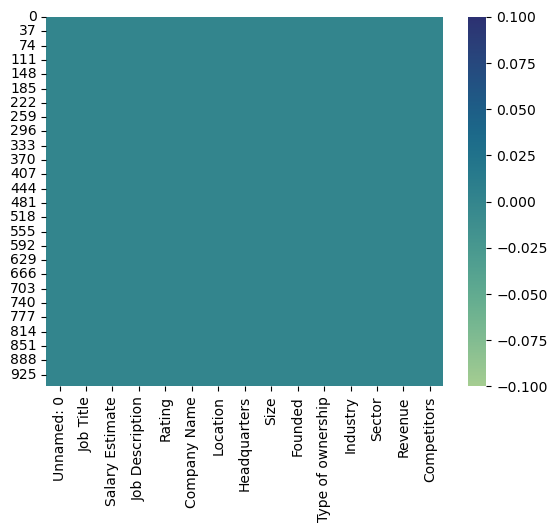

The uniform colour of the heatmap indicates that there are NO missing values


In [599]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap="crest")
plt.show()
print("The uniform colour of the heatmap indicates that there are NO missing values")

### What did you know about your dataset?

The dataset contains job postings from Glassdoor website with various features such as job title, salary estimate, job description, company name, location, headquarters, revenue, sector and many more. There are some missing values in the dataset, particularly in the 'Competitors' column. The dataset has both numerical and categorical features, which will require preprocessing before building the model.

## ***2. Understanding Your Variables***

In [600]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [601]:
# Dataset Describe
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


### Variables Description

- **Job Title**: The title of the job posting.
- **Salary Estimate**: The estimated salary range for the job given.
- **Job Description**: A description/responsibilities of the job posting.
- **Rating**: The company's rating on Glassdoor's website.
- **Company Name**: The name of the company posting the job on the website.
- **Location**: The location of the job.
- **Headquarters**: The headquarters location of the company.
- **Size**: The size of the company in terms of total employee count.
- **Founded**: The year the company was founded.
- **Type of ownership**: The type of ownership (private/public etc).
- **Industry**: The industry of the company.
- **Sector**: The sector of the company.
- **Revenue**: The revenue of the company.
- **Competitors**: Competitors of the company (with other company(s) if not then -1).

### Check Unique Values for each variable.

In [602]:
# Check Unique Values for each variable.
df.nunique()

Unnamed: 0           956
Job Title            328
Salary Estimate      417
Job Description      596
Rating                32
Company Name         448
Location             237
Headquarters         235
Size                   9
Founded              109
Type of ownership     13
Industry              63
Sector                25
Revenue               14
Competitors          149
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [603]:
# Before cleaning the data
print(df['Salary Estimate'], "\n")
print(df['Salary Estimate'].shape)

0       $53K-$91K (Glassdoor est.)
1      $63K-$112K (Glassdoor est.)
2       $80K-$90K (Glassdoor est.)
3       $56K-$97K (Glassdoor est.)
4      $86K-$143K (Glassdoor est.)
                  ...             
951    $72K-$133K (Glassdoor est.)
952     $56K-$91K (Glassdoor est.)
953    $95K-$160K (Glassdoor est.)
954                             -1
955    $61K-$126K (Glassdoor est.)
Name: Salary Estimate, Length: 956, dtype: object 

(956,)


In [604]:
# Write your code to make your dataset analysis ready.

def clean_salary(salary):
  if pd.isna(salary) or salary == '-1':
    return np.nan

  salary = salary.split('(')[0].strip()

  if 'Employer Provided Salary:' in salary:
    salary=salary.replace('Employer Provided Salary:', '').strip()
  
  if 'Per Hour' in salary.lower():
    salary = salary.lower().replace(' Per Hour', '').strip()
    if '-' in salary:
      min_rate, max_rate = salary.split('-')
      min_rate = float(min_rate.replace('$', '').strip())
      max_rate = float(max_rate.replace('$', '').strip())
    else:

      rate = float(salary.replace('$', '').strip())
      min_rate = max_rate = rate
      
    # Convert to annual (40 hours/week, 52 weeks/year)
    min_annual = int(min_rate * 40 * 52 / 1000)
    max_annual = int(max_rate * 40 * 52 / 1000)
    return f"{min_annual}K-{max_annual}K"

    # min_hourly, max_hourly = hourly_range.split('-')
    # min_hourly = float(min_hourly.replace('$', '').strip())
    # max_hourly=float(max_hourly.replace('$', '').strip())

    # min_annual = min_hourly * 40 * 52 / 1000 # to thousands
    # max_annual = max_hourly * 40 * 52 / 1000 # to thousands
    # return f"{min_annual:.0f}K-{max_annual:.0f}K"

  if '-' in salary:
    min_salary, max_salary = salary.split('-')
    min_salary = min_salary.replace('$', '').replace('K', '').strip()
    max_salary = max_salary.replace('$', '').replace('K', '').strip()
    try:
      min_salary=int(float(min_salary))
      max_salary=int(float(max_salary))
      return f"{min_salary}K-{max_salary}K"
    except ValueError:
      return np.nan
    
    # If no valid format is found, return NaN
  return np.nan

cleaned_df = pd.read_csv('glassdoor_jobs.csv')
cleaned_df = cleaned_df.loc[:, ~cleaned_df.columns.str.contains('^Unnamed')]
cleaned_df['Salary Estimate'] = cleaned_df['Salary Estimate'].apply(clean_salary)
cleaned_df.dropna(subset=['Salary Estimate'], inplace=True)
cleaned_df['Company Age'] = 2025 - cleaned_df['Founded']
cleaned_df.drop('Founded', axis=1, inplace=True)

# taking out the max and min salary from the range
cleaned_df['Min_Salary'] = cleaned_df['Salary Estimate'].apply(lambda a: int(a.split('-')[0].replace('K', '')))
cleaned_df['Min_Salary']
cleaned_df['Max_Salary'] = cleaned_df['Salary Estimate'].apply(lambda a: int(a.split('-')[1].replace('K', '')))
cleaned_df['Max_Salary']

# avg sal
cleaned_df['Average_Salary'] = (cleaned_df['Min_Salary'] + cleaned_df['Max_Salary']) / 2
print(cleaned_df[['Salary Estimate', 'Min_Salary', 'Max_Salary', 'Average_Salary']].head())

  Salary Estimate  Min_Salary  Max_Salary  Average_Salary
0         53K-91K          53          91            72.0
1        63K-112K          63         112            87.5
2         80K-90K          80          90            85.0
3         56K-97K          56          97            76.5
4        86K-143K          86         143           114.5


In [605]:
print(cleaned_df)
print(cleaned_df['Salary Estimate'].isnull().sum())

                                             Job Title Salary Estimate  \
0                                       Data Scientist         53K-91K   
1                            Healthcare Data Scientist        63K-112K   
2                                       Data Scientist         80K-90K   
3                                       Data Scientist         56K-97K   
4                                       Data Scientist        86K-143K   
..                                                 ...             ...   
950           Sr Scientist, Immuno-Oncology - Oncology        58K-111K   
951                               Senior Data Engineer        72K-133K   
952  Project Scientist - Auton Lab, Robotics Institute         56K-91K   
953                               Data Science Manager        95K-160K   
955          Research Scientist – Security and Privacy        61K-126K   

                                       Job Description  Rating  \
0    Data Scientist\nLocation: Albuquerque, N

In [606]:
cleaned_df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

### What all manipulations have you done and insights you found?

- Extracted the minimum and maximum salary from the 'Salary Estimate' column.
- Calculated the average salary.
- Dropped the original 'Salary Estimate' column as it is no longer needed.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

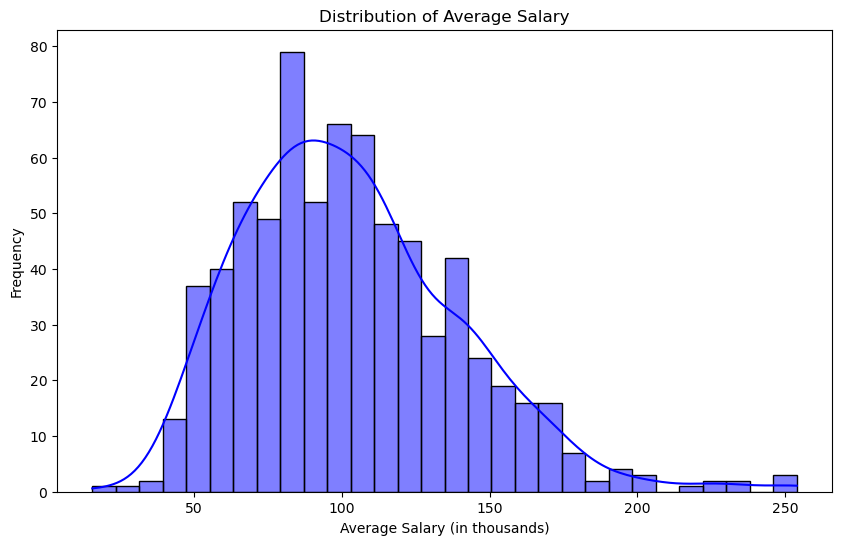

In [607]:
# Chart 1: Distribution of Average Salary (Univariate)
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['Average_Salary'], kde=True, bins=30, color='blue')
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary (in thousands)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

This histogram plot shows the frequency of different average salaries for multiple job roles.

##### 2. What is/are the insight(s) found from the chart?

From the above histogram plot we can observe that as the average salary from $80K to $110k the frequency of the curve increase drastically and reaches highest around the range from `$85k to $94k` the peak is at the highest.

- After the `$100k` mark the frequency of the curve decreases and almost converges with the x-axis from `$200k` onwards 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Positive Impacts:

- <b>Competitive Mid Range Salaries:</b> The distribution shows a strong concentration of salaries between _$75,000-$125,000_, suggesting the company is paying competitive market rates for most positions. This can help with employee retention and attraction of talent, reducing costly turnover. 

- <b>Room for Growth:</b> The extended right tail (showing salaries up to _$250,000_) demonstrates potential for career advancement and higher earnings, which can be a strong motivator for high-performing employees.

#### Negative Impacts:

- <b>Salary Compression:</b> The high concentration in the middle range might indicate salary compression, where experienced employees and new hires have similar salaries. This could lead to dissatisfaction among experienced employees and potentially leaving the company.
  
- <b>Wide Gap between Mid range and top earners:</b> The significant drop in frequency between the peak (_$100,000_) and higher salaries (_$200,000+_) might create perception issues about advancement opportunities, potentially causing mid-level talent to seek opportunities elsewhere.

#### Chart - 2

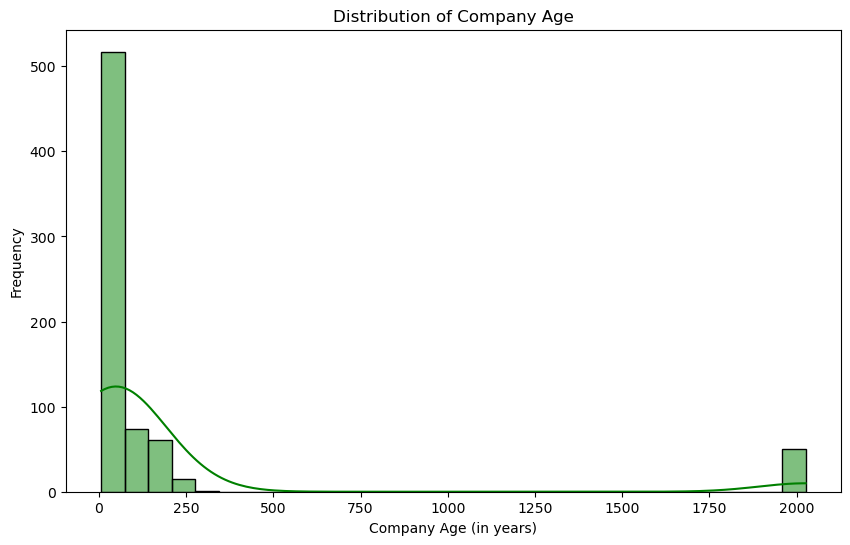

In [608]:
# Chart 2: Distribution of Company Age (Univariate)
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['Company Age'], kde=True, bins=30, color='green')
plt.title('Distribution of Company Age')
plt.xlabel('Company Age (in years)')
plt.ylabel('Frequency')
plt.show()

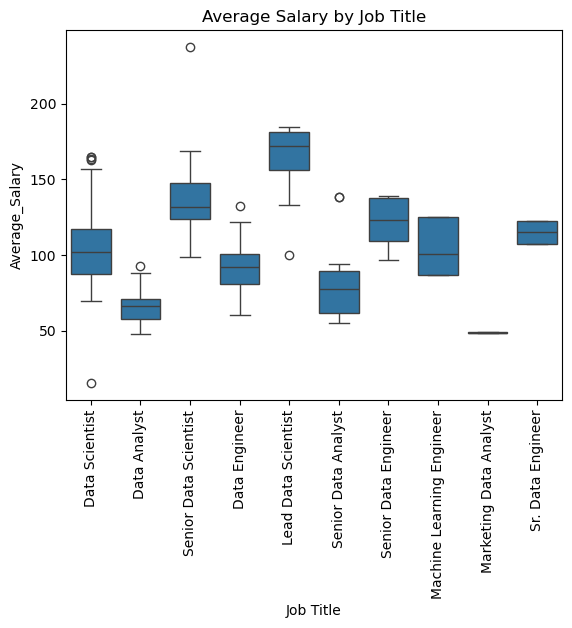

In [609]:
# Chart - 2 visualization code
top_jobs = cleaned_df['Job Title'].value_counts().nlargest(10).index
sns.boxplot(x='Job Title', y='Average_Salary', data=cleaned_df[cleaned_df['Job Title'].isin(top_jobs)])
plt.xticks(rotation=90)
plt.title('Average Salary by Job Title')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot effectively visualizes the distribution of average salaries across different job titles.
- It provides clear summary of the distribution.
- Easy to compare with other job titles along with their average salaries.
- Able to detect outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

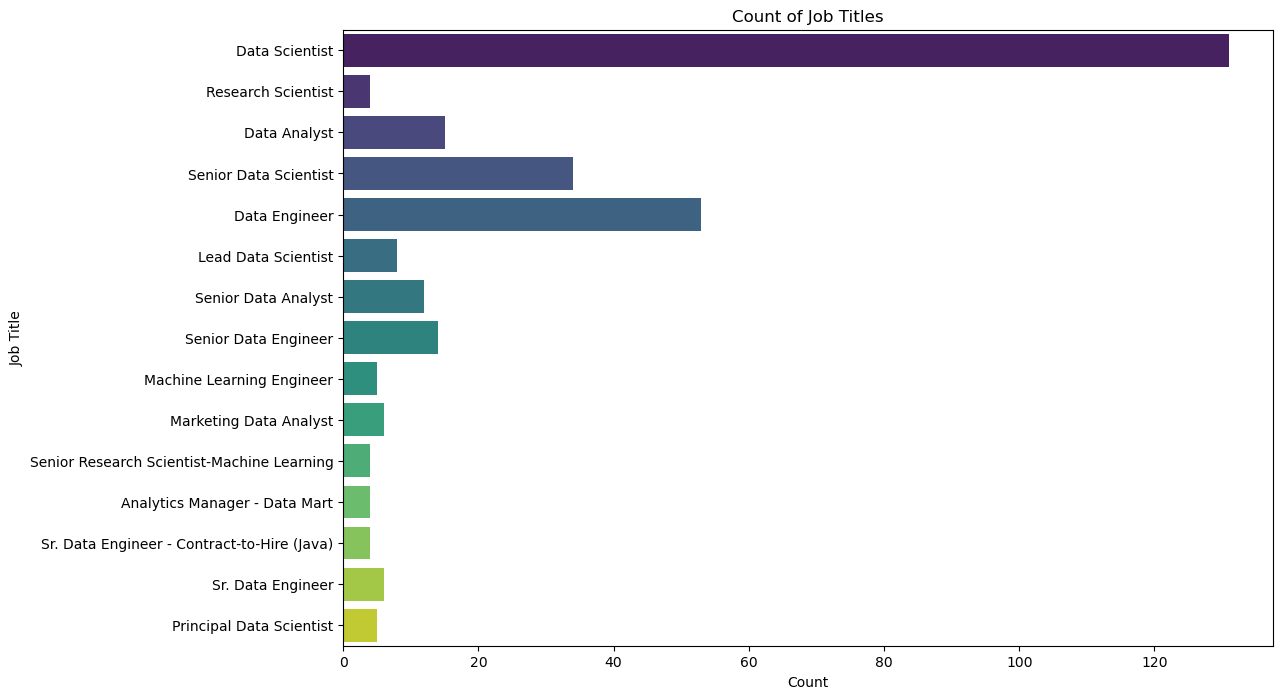

In [610]:
# Chart 3: Count of Job Titles (Univariate)
top_job_3 = cleaned_df['Job Title'].value_counts().nlargest(15).index
plt.figure(figsize=(12, 8))
sns.countplot(y='Job Title', data=cleaned_df[cleaned_df['Job Title'].isin(top_job_3)], palette='viridis', hue='Job Title', legend=False)
plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

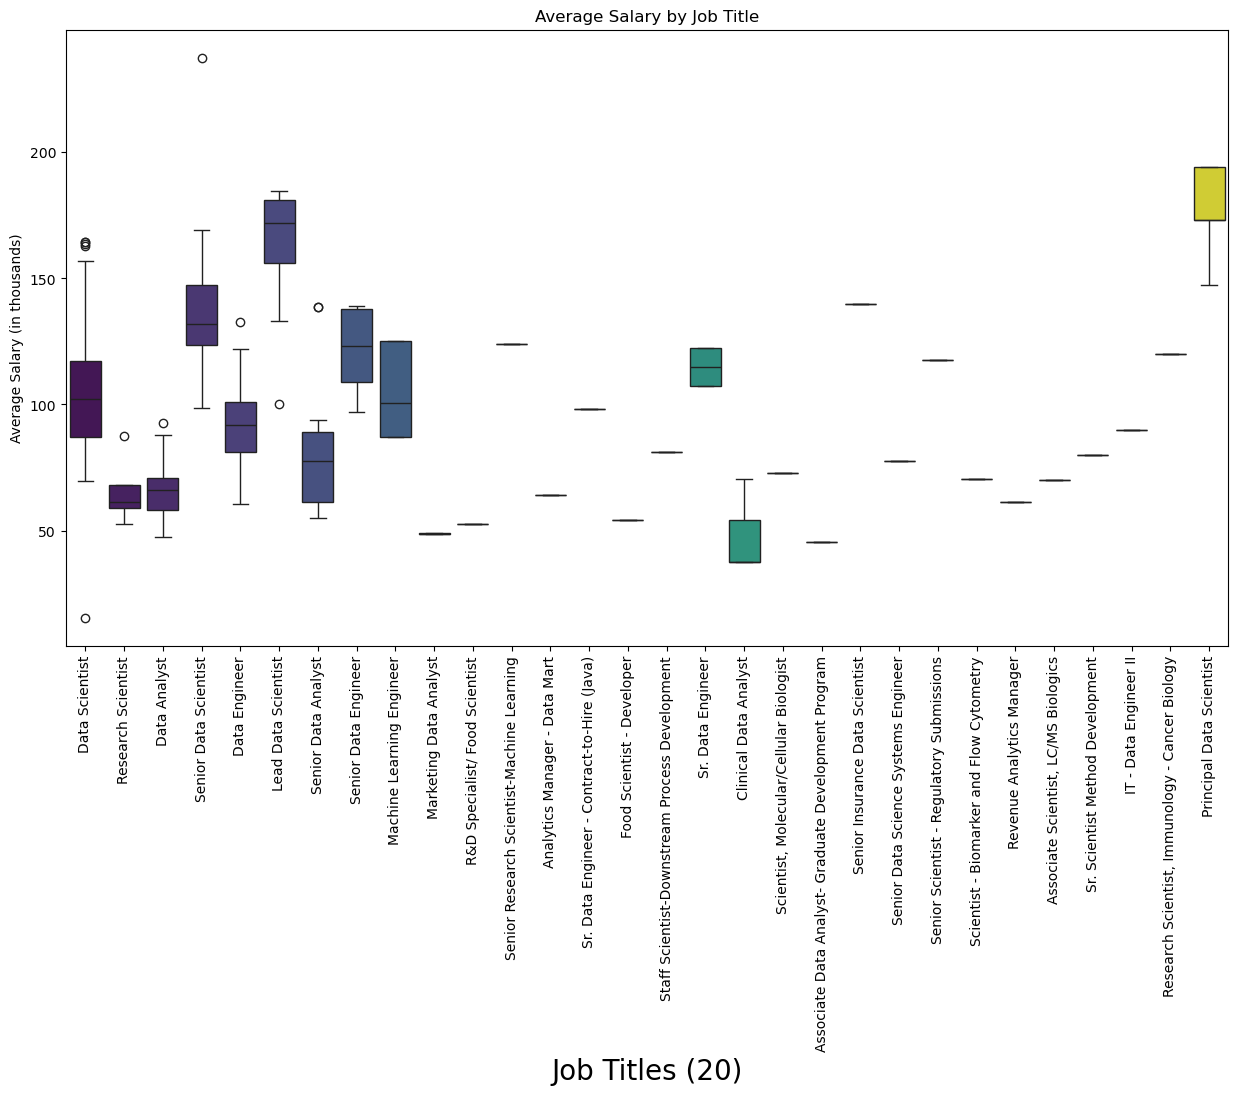

In [611]:
# Chart 4: Average Salary by Job Title - (Bivariate)
top_job_titles = cleaned_df['Job Title'].value_counts().nlargest(30).index
plt.figure(figsize=(15, 8))
sns.boxplot(x='Job Title', y='Average_Salary', hue='Job Title', legend=False, data=cleaned_df[cleaned_df['Job Title'].isin(top_job_titles)], palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Titles (20)', fontsize=20)
plt.ylabel('Average Salary (in thousands)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

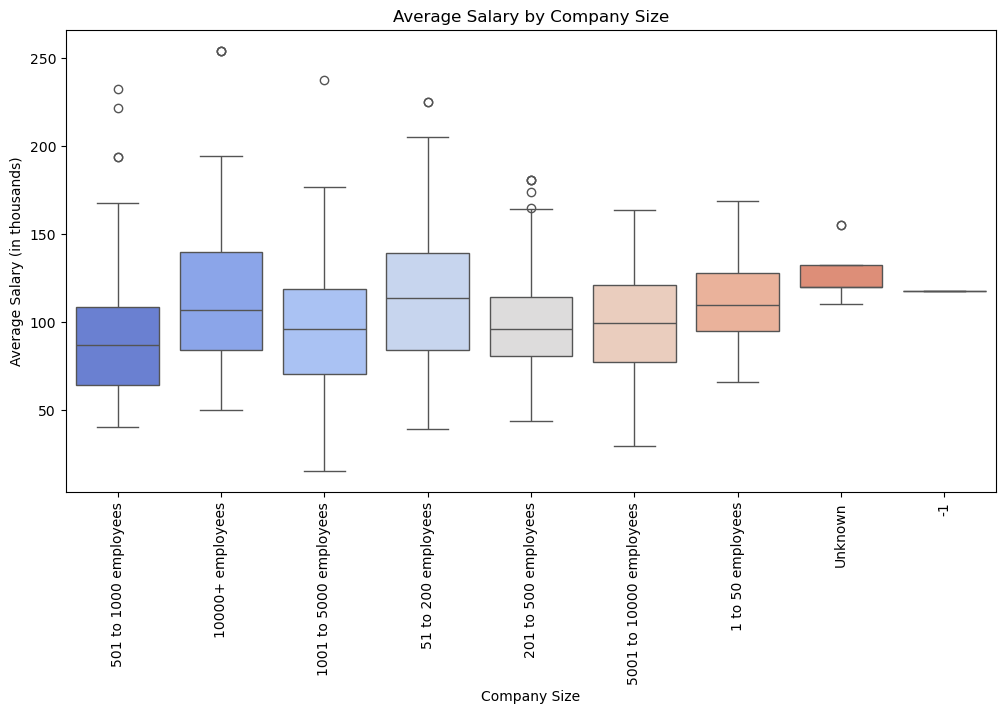

In [612]:
# Chart 5: Average Salary by Company Size (Bivariate - Numerical:Categorical)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Size', hue='Size', legend=False, y='Average_Salary', data=cleaned_df, palette='coolwarm')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.xticks(rotation=90)
plt.ylabel('Average Salary (in thousands)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

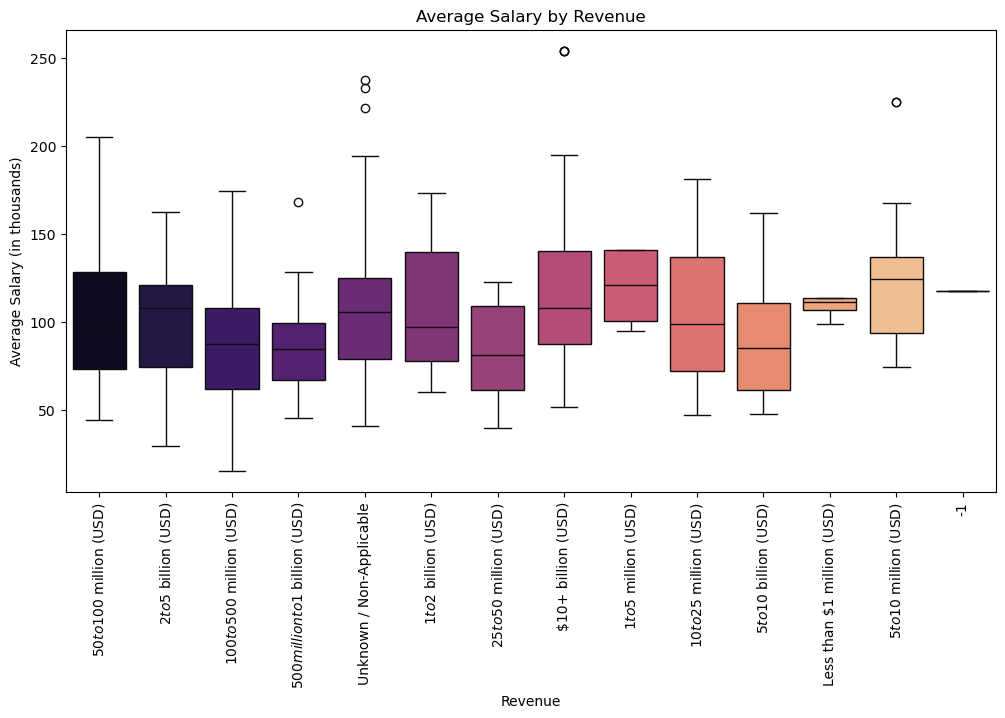

In [613]:
# Chart 6: Average Salary by Revenue - (Bivariate, Numerical:Categorical)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Revenue', y='Average_Salary', hue='Revenue', legend=False, data=cleaned_df, palette='magma')
plt.xticks(rotation=90)
plt.title('Average Salary by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Average Salary (in thousands)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

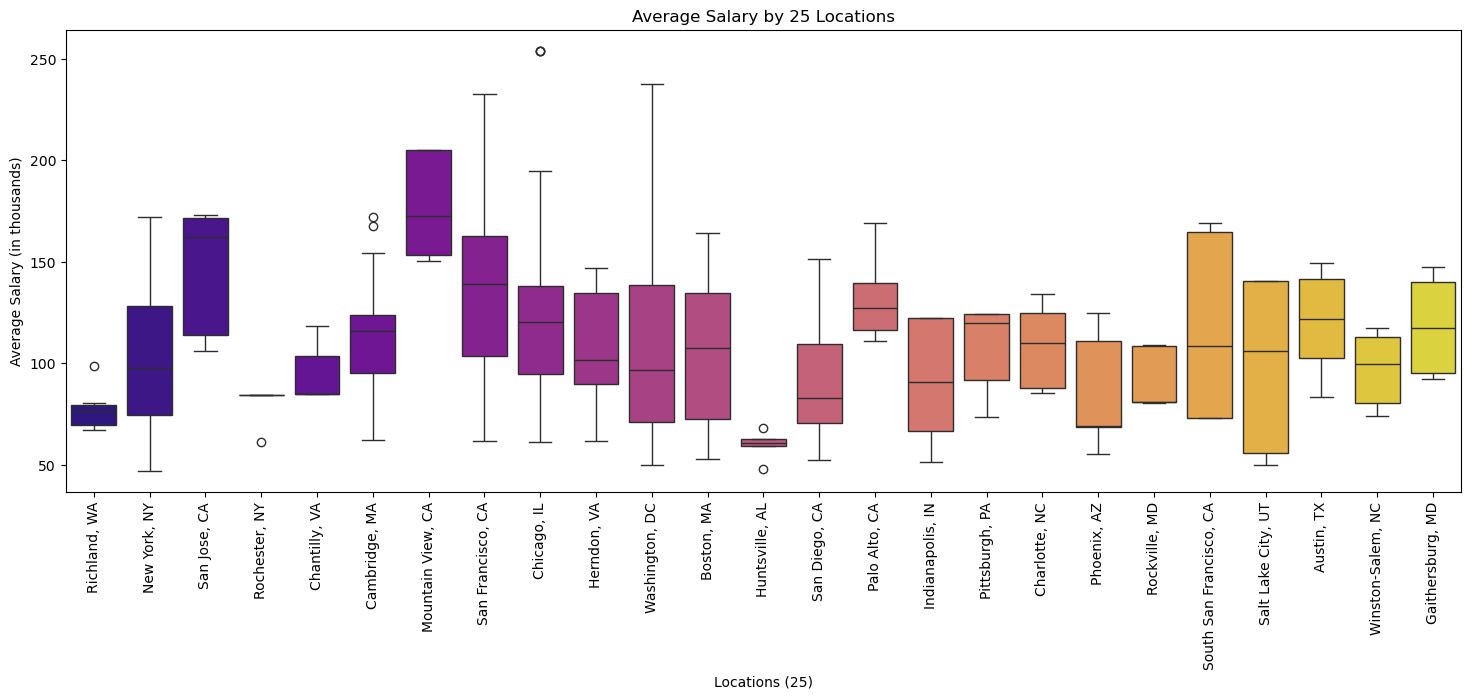

In [614]:
# Chart 7: Average Salary by Location
top_location = cleaned_df['Location'].value_counts().nlargest(25).index
plt.figure(figsize=(18, 6))
sns.boxplot(x='Location', y='Average_Salary', hue='Location', data=cleaned_df[cleaned_df['Location'].isin(top_location)], palette='plasma')
plt.xticks(rotation=90)
plt.title('Average Salary by 25 Locations')
plt.xlabel('Locations (25)')
plt.ylabel('Average Salary (in thousands)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

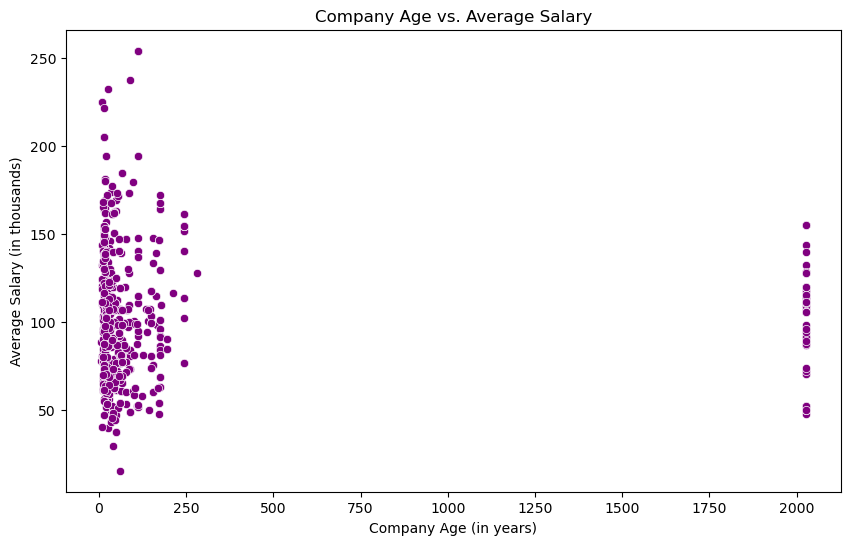

In [615]:
# Chart 8: Scatter Plot - Company Age vs. Average Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company Age', y='Average_Salary', data=cleaned_df, color='purple')
plt.title('Company Age vs. Average Salary')
plt.xlabel('Company Age (in years)')
plt.ylabel('Average Salary (in thousands)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

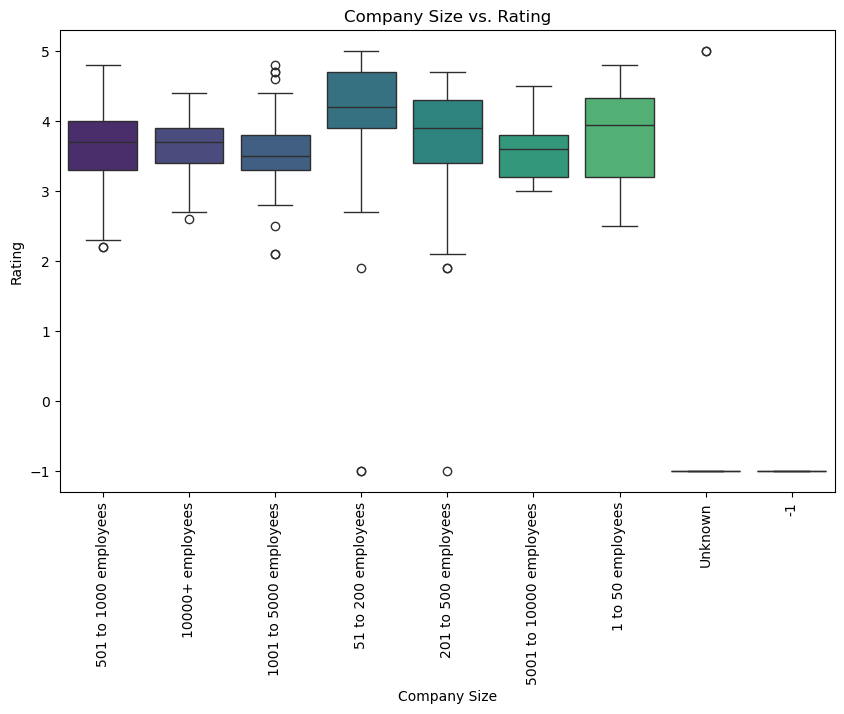

In [616]:
# B11: Company Size vs. Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Size', y='Rating', data=cleaned_df, hue='Size', legend=False, palette='viridis')
plt.title('Company Size vs. Rating')
plt.xlabel('Company Size')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

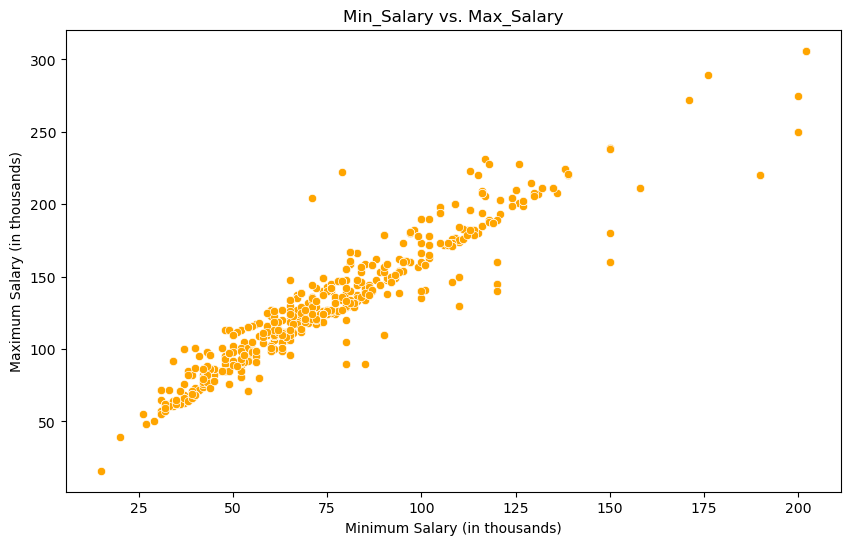

In [617]:
# Chart 10: Scatter Plot - Min_Salary vs. Max_Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min_Salary', y='Max_Salary', data=cleaned_df, color='orange')
plt.title('Min_Salary vs. Max_Salary')
plt.xlabel('Minimum Salary (in thousands)')
plt.ylabel('Maximum Salary (in thousands)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

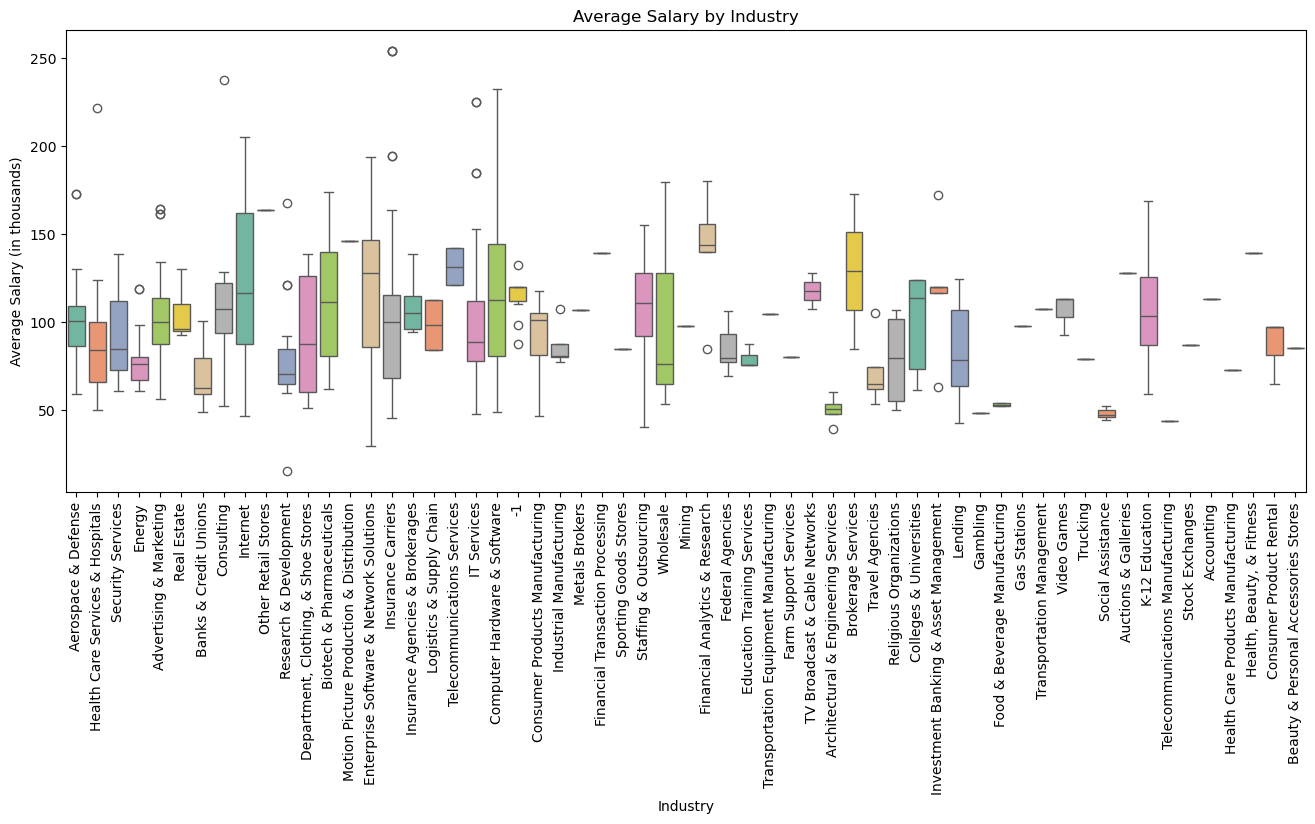

In [618]:
# B4: Average Salary by Industry
plt.figure(figsize=(16, 6))
sns.boxplot(x='Industry', y='Average_Salary', hue='Industry', legend=False, data=cleaned_df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Average Salary by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Salary (in thousands)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

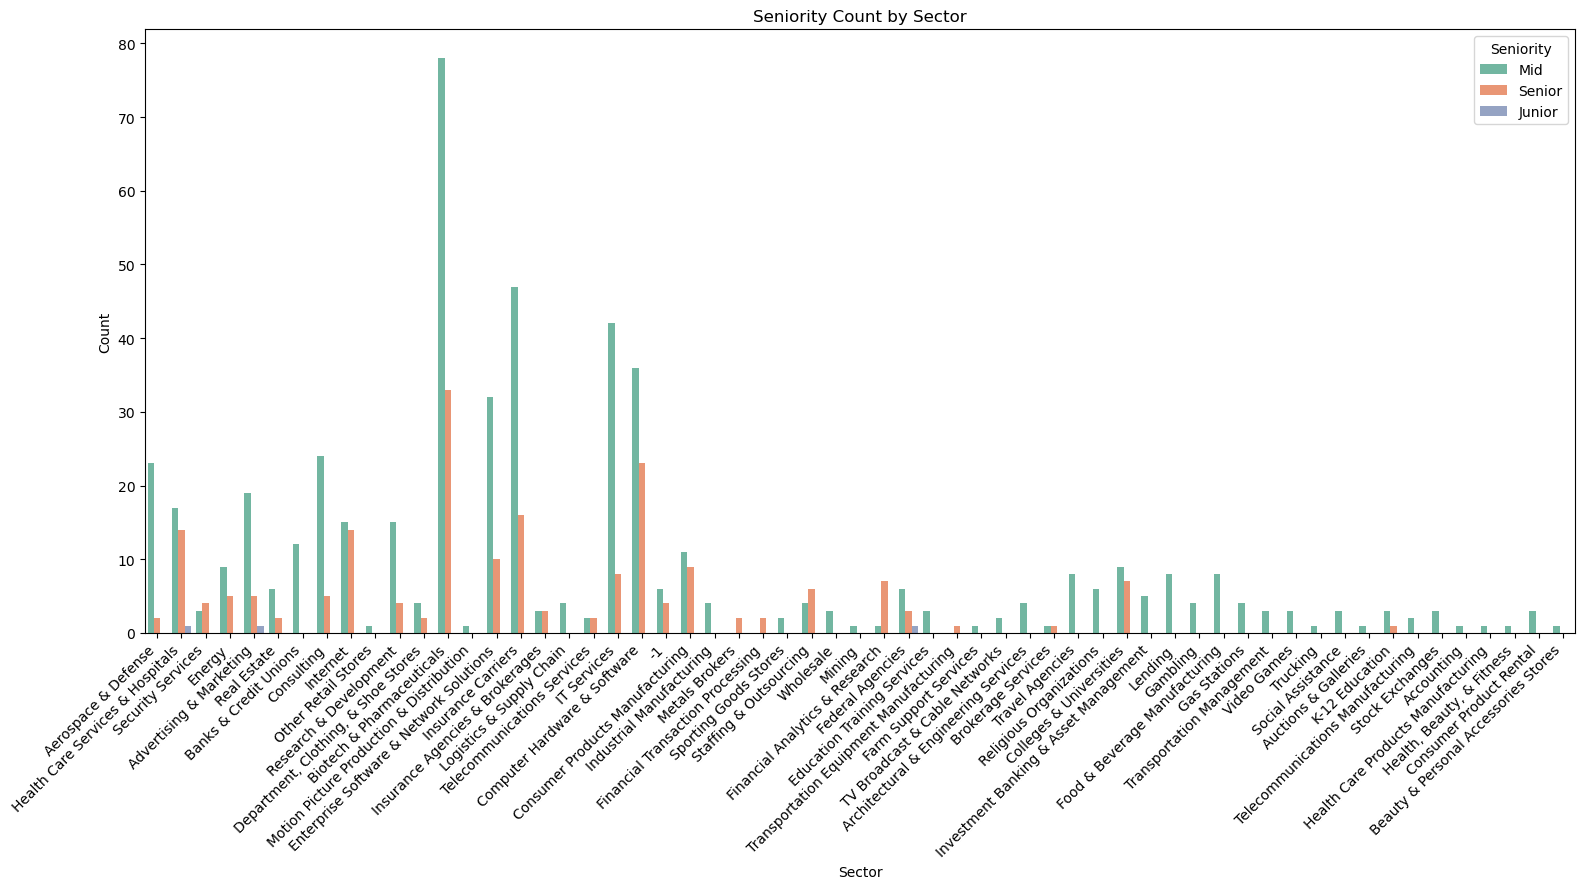

In [619]:
def extract_seniority(job_title):
    # Convert job_title to string to avoid AttributeError
    job_title = str(job_title).lower()
    if 'senior' in job_title or 'lead' in job_title or 'principal' in job_title or 'manager' in job_title:
        return 'Senior'
    elif 'jr' in job_title or 'junior' in job_title or 'entry level' in job_title:
        return 'Junior'
    else:
        return 'Mid'  # Default to Mid-level

cleaned_df['Seniority'] = cleaned_df['Job Title'].apply(extract_seniority)



# B14: Seniority vs. Sector
plt.figure(figsize=(16, 9))
sns.countplot(x='Industry', hue='Seniority', data=cleaned_df, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Seniority Count by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.legend(title='Seniority')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

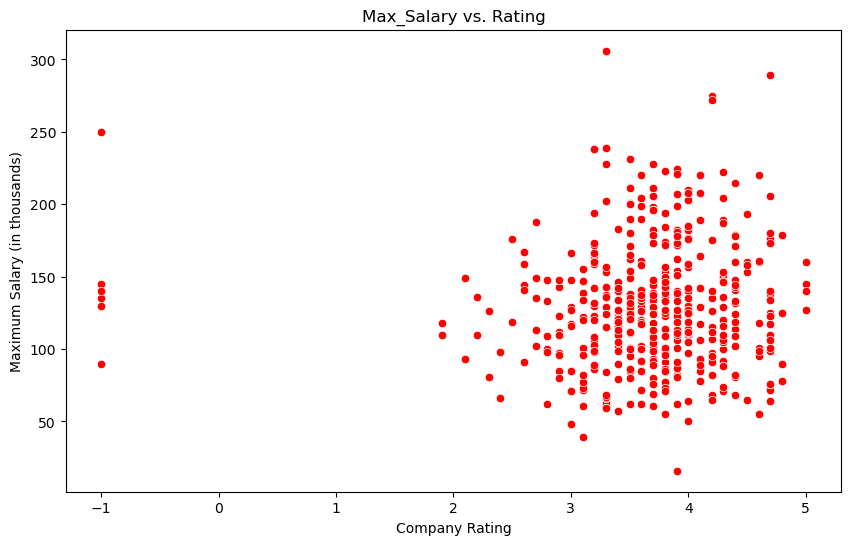

In [620]:
# B10: Scatter Plot - Max_Salary vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Max_Salary', data=cleaned_df, color='red')
plt.title('Max_Salary vs. Rating')
plt.xlabel('Company Rating')
plt.ylabel('Maximum Salary (in thousands)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

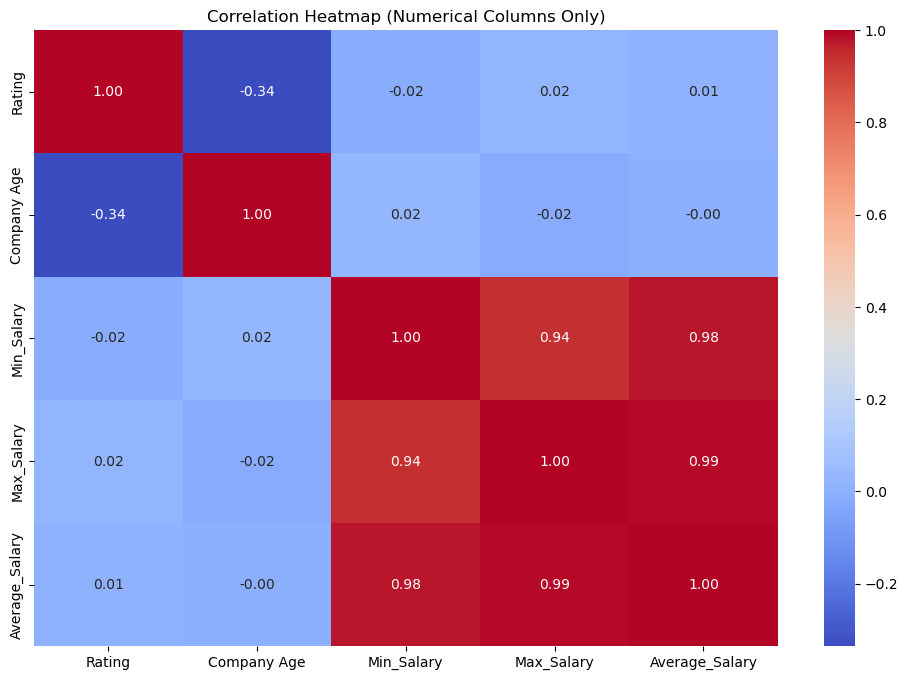

In [621]:
# Select only numerical columns
numerical_columns = cleaned_df.select_dtypes(include=['int64', 'float64']).columns
numerical_df = cleaned_df[numerical_columns]

# Compute correlation matrix
corr = numerical_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Columns Only)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

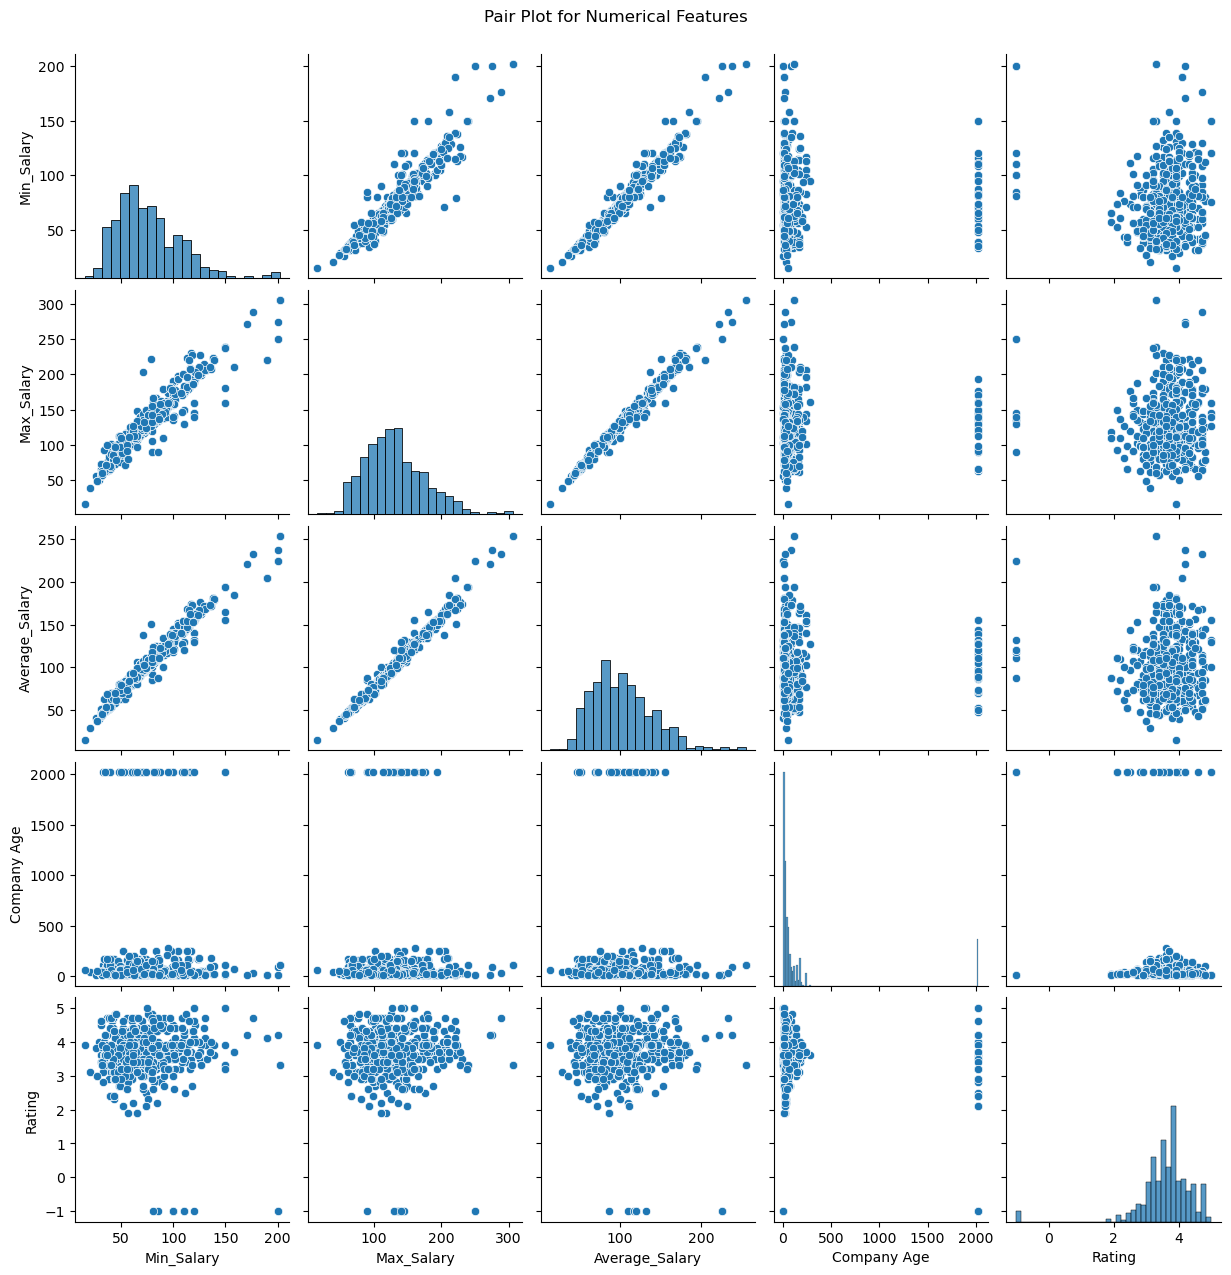

In [622]:
# Chart 11: Pair Plot for Numerical Features
sns.pairplot(cleaned_df[['Min_Salary', 'Max_Salary', 'Average_Salary', 'Company Age', 'Rating']])
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Statement 1: Job Title and Salary
- Hypothesis: The average salary differs significantly across different job titles.
  - Null Hypothesis (H_0): There is no significant difference in average salary across job titles.
  - Alternative Hypothesis (H_1): There is a significant difference in average salary across job titles.

#### 2. Perform an appropriate statistical test.

In [623]:
import scipy.stats as stats

# Group the data by 'Job Title' and extract 'Avg_Salary'
groups = [group['Average_Salary'].values for name, group in cleaned_df.groupby('Job Title')]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Print results
print(f"ANOVA Results for Job Title vs. Avg_Salary:")
print(f"F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis as significant difference in average salary across job titles.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average salary across job titles.")

ANOVA Results for Job Title vs. Avg_Salary:
F-statistic: 10.36, p-value: 0.0000
Reject the null hypothesis as significant difference in average salary across job titles.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Statement 2: Sector and Company Rating

- Statement: The "Aerospace & Defense" sector has a different distribution of company ratings compared to the "Business Services" sector.
  - Null Hypothesis (H0): The distributions of company ratings are the same for the "Aerospace & Defense" and "Business Services" sectors.
  - Alternative Hypothesis (H1): The distributions of company ratings are different for the "Aerospace & Defense" and "Business Services" sectors.

#### 2. Perform an appropriate statistical test.

In [624]:
from scipy import stats

aerospace_ratings = cleaned_df[cleaned_df['Sector'] == 'Aerospace & Defense']['Rating'].dropna()
business_ratings = cleaned_df[cleaned_df['Sector'] == 'Business Services']['Rating'].dropna()

# Perform the Mann-Whitney U test

u_statistic, p_value_2 = stats.mannwhitneyu(aerospace_ratings, business_ratings, alternative='two-sided') #Non-parametric Test

print(f"Mann-Whitney U statistic: {u_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value_2 < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to support that the distributions of company ratings are different for the Aerospace & Defense and Business Services sectors.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence to support that the distributions of company ratings are different for the Aerospace & Defense and Business Services sectors.")


Mann-Whitney U statistic: 1358.5
P-value: 3.422388347618143e-101
Fail to reject the null hypothesis.
There is no significant evidence to support that the distributions of company ratings are different for the Aerospace & Defense and Business Services sectors.


##### Which statistical test have you done to obtain P-Value?

I have used Mann Whitney U statistical testing to obtain the P-value

##### Why did you choose the specific statistical test?

Mann Whitney U is a non-parametric test that doesn't assume normality but does assume that the data is at least ordinal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### Statement 3: Seniority and Average Salary

Statement: Senior positions have a higher average salary than mid-level positions.
- Null Hypothesis (H_0): There is no difference in average salary between senior and mid-level positions.
- Alternative Hypothesis (H_1): The average salary of senior positions is greater than the average salary of mid-level positions. (One-tailed test)

#### 2. Perform an appropriate statistical test.

In [625]:
from scipy import stats

senior_salaries = cleaned_df[cleaned_df['Seniority'] == 'Senior']['Average_Salary'].dropna()
mid_salaries = cleaned_df[cleaned_df['Seniority'] == 'Mid']['Average_Salary'].dropna()

levene_stat, levene_p = stats.levene(senior_salaries, mid_salaries)
print(f"Levene's test statistic: {levene_stat}, p-value: {levene_p}")


if levene_p < 0.05:
    print("Variances are unequal, using Welch's t-test")
    t_statistic, p_value_3 = stats.ttest_ind(senior_salaries, mid_salaries, equal_var=False, alternative='greater')
else:
    t_statistic, p_value_3 = stats.ttest_ind(senior_salaries, mid_salaries, equal_var=True, alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value_3}")

alpha = 0.05

if p_value_3 < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to support that senior positions have a higher average salary than mid-level positions.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant evidence to support that senior positions have a higher average salary than mid-level positions.")


Levene's test statistic: 7.416092620776236, p-value: 0.006622429756330623
Variances are unequal, using Welch's t-test
T-statistic: 7.704061098116122
P-value: 9.020834376751631e-14
Reject the null hypothesis.
There is evidence to support that senior positions have a higher average salary than mid-level positions.


##### Which statistical test have you done to obtain P-Value?

For statement 3 I have used ANOVA (Analysis of variance) to test if there’s a significant difference in average salary across seniority in job titles.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [626]:
cleaned_df.replace("-1", np.nan, inplace=True)

numerical_columns = cleaned_df.select_dtypes(include=['int64', 'float64']).columns
cleaned_df[numerical_columns] = cleaned_df[numerical_columns].fillna(cleaned_df[numerical_columns].median())

# categorical encoding with mode
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns
cleaned_df[categorical_columns]= cleaned_df[categorical_columns].fillna(cleaned_df[categorical_columns].mode().iloc[0])


#### What all missing value imputation techniques have you used and why did you use those techniques?

In the dataset there were some places where the data had -1 in it, so I have replaced them with Nan.

- After that those places where there numerical values in the column like the Revenue column, I have replaced them with median value
- In place where categorical values like in Competitor, I have replaced missing values with their mode

### 2. Handling Outliers

In [627]:
# Handle outliers in 'Avg_Salary' using IQR
Q1 = cleaned_df['Average_Salary'].quantile(0.25)
Q3 = cleaned_df['Average_Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = cleaned_df[(cleaned_df['Average_Salary'] >= lower_bound) & (cleaned_df['Average_Salary'] <= upper_bound)]
cleaned_df['Average_Salary']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
950     84.5
951    102.5
952     73.5
953    127.5
955     93.5
Name: Average_Salary, Length: 707, dtype: float64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Used IQR (Interquartile Range) to detect and handle outliers, because it is a very robust method and works well with this type of datasets.
- Works well for skewed dataset

### 3. Categorical Encoding

In [628]:
# Encode your categorical columns
# using One hot encoding

label_encoder = LabelEncoder()
categorical_columns = ['Job Title', 'Location', 'Company Name', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Headquarters', 'Competitors']
for i in categorical_columns:
  cleaned_df[i]= label_encoder.fit_transform(cleaned_df[i])

cleaned_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Company Age,Min_Salary,Max_Salary,Average_Salary,Seniority
0,67,53K-91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,284,3,68,5,1,2,1,9,76,52,53,91,72.0,Mid
1,102,63K-112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,308,97,10,1,6,26,10,5,76,41,63,112,87.5,Mid
2,67,80K-90K,"KnowBe4, Inc. is a high growth information sec...",4.8,156,41,41,5,1,44,5,4,76,15,80,90,85.0,Mid
3,67,56K-97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,208,151,143,2,3,16,17,10,78,60,56,97,76.5,Mid
4,67,86K-143K,Data Scientist\nAffinity Solutions / Marketing...,2.9,13,119,113,6,1,1,5,12,28,27,86,143,114.5,Mid


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used LabelEncoder from scikit-learn as a method of one hot encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [629]:
#%pip install contractions

In [630]:
# Expand Contraction
import contractions

cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(lambda x: contractions.fix(x))
cleaned_df['Job Description']
# basically if a sentence given is like : I'll be there within 6 min.
# after contraction.fix() : I will be there within 6 min.

0      Data Scientist\nLocation: Albuquerque, NM\nEdu...
1      What You Will Do:\n\nI. General Summary\n\nThe...
2      KnowBe4, Inc. is a high growth information sec...
3      *Organization and Job ID**\nJob ID: 310709\n\n...
4      Data Scientist\nAffinity Solutions / Marketing...
                             ...                        
950    Site Name: USA - Massachusetts - Cambridge\nPo...
951    THE CHALLENGE\nEventbrite has a world-class da...
952    The Auton Lab at Carnegie Mellon University is...
953    Data Science ManagerResponsibilities:\n\nOvers...
955    Returning Candidate? Log back in to the Career...
Name: Job Description, Length: 707, dtype: object

#### 2. Lower Casing

In [631]:
# Lower Casing
cleaned_df['Job Description'] = cleaned_df['Job Description'].str.lower()
cleaned_df['Job Description']

0      data scientist\nlocation: albuquerque, nm\nedu...
1      what you will do:\n\ni. general summary\n\nthe...
2      knowbe4, inc. is a high growth information sec...
3      *organization and job id**\njob id: 310709\n\n...
4      data scientist\naffinity solutions / marketing...
                             ...                        
950    site name: usa - massachusetts - cambridge\npo...
951    the challenge\neventbrite has a world-class da...
952    the auton lab at carnegie mellon university is...
953    data science managerresponsibilities:\n\novers...
955    returning candidate? log back in to the career...
Name: Job Description, Length: 707, dtype: object

#### 3. Removing Punctuations

In [632]:
# Remove Punctuations
cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
cleaned_df['Job Description']

0      data scientist\nlocation albuquerque nm\neduca...
1      what you will do\n\ni general summary\n\nthe h...
2      knowbe4 inc is a high growth information secur...
3      organization and job id\njob id 310709\n\ndire...
4      data scientist\naffinity solutions  marketing ...
                             ...                        
950    site name usa  massachusetts  cambridge\nposte...
951    the challenge\neventbrite has a worldclass dat...
952    the auton lab at carnegie mellon university is...
953    data science managerresponsibilities\n\noverse...
955    returning candidate log back in to the career ...
Name: Job Description, Length: 707, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [633]:
# Remove URLs & Remove words and digits contain digits

# for remvoing urls
cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(lambda a: re.sub(r'https\S+|www\S+|https\S+', '', a, flags=re.MULTILINE))

# digits removal
cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(lambda x: re.sub(r'\d+', '', x))

# remove special word
cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(lambda b: re.sub(r'\b(job|description)\b', '', b))

cleaned_df['Job Description']

0      data scientist\nlocation albuquerque nm\neduca...
1      what you will do\n\ni general summary\n\nthe h...
2      knowbe inc is a high growth information securi...
3      organization and  id\n id \n\ndirectorate eart...
4      data scientist\naffinity solutions  marketing ...
                             ...                        
950    site name usa  massachusetts  cambridge\nposte...
951    the challenge\neventbrite has a worldclass dat...
952    the auton lab at carnegie mellon university is...
953    data science managerresponsibilities\n\noverse...
955    returning candidate log back in to the career ...
Name: Job Description, Length: 707, dtype: object

#### 5. Removing Stopwords & Removing White spaces

In [634]:
#%pip install nltk

In [635]:
# Remove Stopwords
nltk.download('stopwords')

stop_words= set(stopwords.words('english'))
cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(lambda x: ' '.join(i for i in x.split() if i not in stop_words))
cleaned_df['Job Description']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sourasishmondal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      data scientist location albuquerque nm educati...
1      general summary healthcare data scientist posi...
2      knowbe inc high growth information security co...
3      organization id id directorate earth biologica...
4      data scientist affinity solutions marketing cl...
                             ...                        
950    site name usa massachusetts cambridge posted d...
951    challenge eventbrite worldclass data repositor...
952    auton lab carnegie mellon university large aca...
953    data science managerresponsibilities oversee t...
955    returning candidate log back career portal cli...
Name: Job Description, Length: 707, dtype: object

In [636]:
# Remove White spaces
cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(lambda x: ' '.join(x.split()))
cleaned_df['Job Description']


0      data scientist location albuquerque nm educati...
1      general summary healthcare data scientist posi...
2      knowbe inc high growth information security co...
3      organization id id directorate earth biologica...
4      data scientist affinity solutions marketing cl...
                             ...                        
950    site name usa massachusetts cambridge posted d...
951    challenge eventbrite worldclass data repositor...
952    auton lab carnegie mellon university large aca...
953    data science managerresponsibilities oversee t...
955    returning candidate log back career portal cli...
Name: Job Description, Length: 707, dtype: object

#### 6. Rephrase Text

In [637]:
#%pip install pyspellchecker

In [638]:
# Rephrase Text
# from textblob import TextBlob
# from multiprocessing import Pool, cpu_count
# from spellchecker import SpellChecker

# def rep_text(text):
#   b = TextBlob(text)
#   return str(b.correct())

# spell = SpellChecker()

# def correct_text(t):
#   words= t.split()
#   cor_word = [spell.correction(word) or word for word in words]
#   return " ".join(cor_word)

# cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(correct_text)

# with Pool(cpu_count()) as pool:
#   cleaned_df['Job Description'] = pool.map(rep_text, cleaned_df['Job Description'])


# this part was taking way too much time, so commented out
  

#### 7. Tokenization

In [639]:
# Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
cleaned_df['Job Description'] = cleaned_df['Job Description'].apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sourasishmondal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### 8. Text Normalization

In [640]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

stemmer = PorterStemmer()
lemm = WordNetLemmatizer()

cleaned_df['Stemmed_Description'] = cleaned_df['Job Description'].apply(lambda tk: [stemmer.stem(t) for t in tk])

#lemmatization
cleaned_df['Lemmatized_Description'] = cleaned_df['Job Description'].apply(lambda x: [lemm.lemmatize(i) for i in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sourasishmondal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sourasishmondal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##### Which text normalization technique have you used and why?

I have used PorterStemmer and WordNetLemmatizer from nltk library

In [641]:
cleaned_df['Stemmed_Description']

0      [data, scientist, locat, albuquerqu, nm, educ,...
1      [gener, summari, healthcar, data, scientist, p...
2      [knowb, inc, high, growth, inform, secur, comp...
3      [organ, id, id, director, earth, biolog, scien...
4      [data, scientist, affin, solut, market, cloud,...
                             ...                        
950    [site, name, usa, massachusett, cambridg, post...
951    [challeng, eventbrit, worldclass, data, reposi...
952    [auton, lab, carnegi, mellon, univers, larg, a...
953    [data, scienc, managerrespons, overse, team, d...
955    [return, candid, log, back, career, portal, cl...
Name: Stemmed_Description, Length: 707, dtype: object

#### 9. Part of speech tagging

In [642]:
# POS Taging
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger_eng')
cleaned_df['POS_tags'] = cleaned_df['Job Description'].apply(pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/sourasishmondal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [643]:
cleaned_df['POS_tags']

0      [(data, NNS), (scientist, NN), (location, NN),...
1      [(general, JJ), (summary, NN), (healthcare, NN...
2      [(knowbe, NN), (inc, NN), (high, JJ), (growth,...
3      [(organization, NN), (id, NN), (id, JJ), (dire...
4      [(data, NNS), (scientist, NN), (affinity, NN),...
                             ...                        
950    [(site, NN), (name, NN), (usa, JJ), (massachus...
951    [(challenge, NN), (eventbrite, JJ), (worldclas...
952    [(auton, NN), (lab, NN), (carnegie, NN), (mell...
953    [(data, NNS), (science, NN), (managerresponsib...
955    [(returning, VBG), (candidate, NN), (log, NN),...
Name: POS_tags, Length: 707, dtype: object

#### 10. Text Vectorization

In [644]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_df['Lemmatized_Text'] = cleaned_df['Lemmatized_Description'].apply(lambda tokens: ' '.join(tokens))
cleaned_df['Lemmatized_Text']
cleaned_df['Lemmatized_Description']
# cleaned_df['Stemmed_Description']

0      [data, scientist, location, albuquerque, nm, e...
1      [general, summary, healthcare, data, scientist...
2      [knowbe, inc, high, growth, information, secur...
3      [organization, id, id, directorate, earth, bio...
4      [data, scientist, affinity, solution, marketin...
                             ...                        
950    [site, name, usa, massachusetts, cambridge, po...
951    [challenge, eventbrite, worldclass, data, repo...
952    [auton, lab, carnegie, mellon, university, lar...
953    [data, science, managerresponsibilities, overs...
955    [returning, candidate, log, back, career, port...
Name: Lemmatized_Description, Length: 707, dtype: object

In [645]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vector = TfidfVectorizer(max_features=1000)
# tfidf_matrix = tfidf_vector.fit_transform(cleaned_df['Lemmatized_Text'])
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vector.get_feature_names_out())
# cleaned_df = pd.concat([cleaned_df, tfidf_df], axis=1)

# # Drop the original 'Lemmatized_Description' column
# cleaned_df.drop('Lemmatized_Description', axis=1, inplace=True)


##### Which text vectorization technique have you used and why?

I have used TF-IDF (Term Frequency Inverse Document Frequency)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [646]:
# Manipulate Features to minimize feature correlation and create new features


cleaned_df['Salary Range'] = cleaned_df['Max_Salary'] - cleaned_df['Min_Salary']

# to reduce skewness
cleaned_df['Log_avg_salary'] = np.log(cleaned_df['Average_Salary'] + 1)
cleaned_df['Log_avg_salary']

0      4.290459
1      4.483003
2      4.454347
3      4.350278
4      4.749271
         ...   
950    4.448516
951    4.639572
952    4.310799
953    4.855929
955    4.548600
Name: Log_avg_salary, Length: 707, dtype: float64

In [647]:
print(cleaned_df.head())

   Job Title Salary Estimate  \
0         67         53K-91K   
1        102        63K-112K   
2         67         80K-90K   
3         67         56K-97K   
4         67        86K-143K   

                                     Job Description  Rating  Company Name  \
0  [data, scientist, location, albuquerque, nm, e...     3.8           284   
1  [general, summary, healthcare, data, scientist...     3.4           308   
2  [knowbe, inc, high, growth, information, secur...     4.8           156   
3  [organization, id, id, directorate, earth, bio...     3.8           208   
4  [data, scientist, affinity, solutions, marketi...     2.9            13   

   Location  Headquarters  Size  Type of ownership  Industry  ...  Min_Salary  \
0         3            68     5                  1         2  ...          53   
1        97            10     1                  6        26  ...          63   
2        41            41     5                  1        44  ...          80   
3       151   

#### 2. Feature Selection

In [648]:
# Select your features wisely to avoid overfitting
corr_target = numerical_df.corr()['Average_Salary'].abs().sort_values(ascending=False)
imp_features = corr_target[1:5].index.tolist()
print(corr_target)
print("Top 10 features: ", imp_features)

# cleaned_df.head()

Average_Salary    1.000000
Max_Salary        0.989781
Min_Salary        0.978927
Rating            0.006131
Company Age       0.002668
Name: Average_Salary, dtype: float64
Top 10 features:  ['Max_Salary', 'Min_Salary', 'Rating', 'Company Age']


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

If any feature is highly skewed, we can apply transformations like Log Transform to reduce the skewness of the data, making it normally distributed

In [649]:
# Transform Your data
skewed_features = ['Min_Salary', 'Max_Salary', 'Company Age', 'Average_Salary']
for feature in skewed_features:
  cleaned_df[f'Log_{feature}'] = np.log(cleaned_df[feature] + 1)

cleaned_df['Company Age']

0        52
1        41
2        15
3        60
4        27
       ... 
950     195
951      19
952      41
953    2026
955      58
Name: Company Age, Length: 707, dtype: int64

### 6. Data Scaling

In [650]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_features = ['Rating', 'Salary Range', 'Log_avg_salary', 'Min_Salary', 'Max_Salary', 'Company Age', 'Log_Min_Salary', 'Log_Max_Salary', 'Log_Company Age']
cleaned_df[numerical_features] = scaler.fit_transform(cleaned_df[numerical_features])
cleaned_df[numerical_features]

# X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# X_test[numerical_features] = scaler.transform(X_test[numerical_features])

,Rating,Salary Range,Log_avg_salary,Min_Salary,Max_Salary,Company Age,Log_Min_Salary,Log_Max_Salary,Log_Company Age
0,0.217484,-0.905469,-0.810602,-0.772056,-0.914003,-0.280644,-0.697710,-0.856884,0.037262
1,-0.297198,-0.294199,-0.252718,-0.405275,-0.400019,-0.302298,-0.244281,-0.244300,-0.139988
2,1.504192,-2.461429,-0.335745,0.218253,-0.938478,-0.353479,0.384401,-0.889447,-0.875347
3,0.217484,-0.738759,-0.637281,-0.662022,-0.767150,-0.264896,-0.553415,-0.668642,0.144381
4,-0.940552,0.150361,0.518779,0.438322,0.358719,-0.329857,0.575112,0.478006,-0.448939
...,...,...,...,...,...,...,...,...,...
950,0.346155,-0.071919,-0.352640,-0.588666,-0.424494,0.000852,-0.461378,-0.270785,1.033780
951,0.989509,0.372641,0.200932,-0.075172,0.113965,-0.345605,0.106872,0.263561,-0.705320
952,-1.326564,-1.072179,-0.751668,-0.662022,-0.914003,-0.302298,-0.553415,-0.856884,-0.139988
953,-0.554540,0.594921,0.827816,0.768425,0.774801,3.605188,0.837830,0.810492,2.813884


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [651]:
cleaned_df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,Stemmed_Description,Lemmatized_Description,POS_tags,Lemmatized_Text,Salary Range,Log_avg_salary,Log_Min_Salary,Log_Max_Salary,Log_Company Age,Log_Average_Salary
0,67,53K-91K,"[data, scientist, location, albuquerque, nm, e...",0.217484,284,3,68,5,1,2,...,"[data, scientist, locat, albuquerqu, nm, educ,...","[data, scientist, location, albuquerque, nm, e...","[(data, NNS), (scientist, NN), (location, NN),...",data scientist location albuquerque nm educati...,-0.905469,-0.810602,-0.697710,-0.856884,0.037262,4.290459
1,102,63K-112K,"[general, summary, healthcare, data, scientist...",-0.297198,308,97,10,1,6,26,...,"[gener, summari, healthcar, data, scientist, p...","[general, summary, healthcare, data, scientist...","[(general, JJ), (summary, NN), (healthcare, NN...",general summary healthcare data scientist posi...,-0.294199,-0.252718,-0.244281,-0.244300,-0.139988,4.483003
2,67,80K-90K,"[knowbe, inc, high, growth, information, secur...",1.504192,156,41,41,5,1,44,...,"[knowb, inc, high, growth, inform, secur, comp...","[knowbe, inc, high, growth, information, secur...","[(knowbe, NN), (inc, NN), (high, JJ), (growth,...",knowbe inc high growth information security co...,-2.461429,-0.335745,0.384401,-0.889447,-0.875347,4.454347
3,67,56K-97K,"[organization, id, id, directorate, earth, bio...",0.217484,208,151,143,2,3,16,...,"[organ, id, id, director, earth, biolog, scien...","[organization, id, id, directorate, earth, bio...","[(organization, NN), (id, NN), (id, JJ), (dire...",organization id id directorate earth biologica...,-0.738759,-0.637281,-0.553415,-0.668642,0.144381,4.350278
4,67,86K-143K,"[data, scientist, affinity, solutions, marketi...",-0.940552,13,119,113,6,1,1,...,"[data, scientist, affin, solut, market, cloud,...","[data, scientist, affinity, solution, marketin...","[(data, NNS), (scientist, NN), (affinity, NN),...",data scientist affinity solution marketing clo...,0.150361,0.518779,0.575112,0.478006,-0.448939,4.749271


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [652]:
# Split your data to train and test. Choose Splitting ratio wisely.
to_drop = ['Job Description', 'Stemmed_Description', 'Lemmatized_Description', 'POS_tags', 'Lemmatized_Text', 'Seniority', 'Salary Estimate']
cleaned_df = cleaned_df.drop(columns=to_drop)
X = cleaned_df.drop(['Average_Salary', 'Min_Salary', 'Max_Salary'], axis=1)
y = cleaned_df['Average_Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (565, 18) (565,)
Testing set shape:  (142, 18)


In [653]:
X_train

,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Company Age,Salary Range,Log_avg_salary,Log_Min_Salary,Log_Max_Salary,Log_Company Age,Log_Average_Salary
183,182,0.217484,153,48,170,4,2,51,20,5,76,-0.325920,0.539351,1.137598,1.225294,1.058928,-0.396369,4.962845
266,26,0.860838,93,50,47,2,1,55,21,12,79,-0.296393,-0.127489,-0.545291,-0.697710,-0.434836,-0.087418,4.382027
335,234,0.088814,280,26,120,1,2,7,4,3,76,0.097309,1.928602,1.507989,1.388504,1.559284,1.203808,5.090678
568,49,0.989509,266,77,133,0,1,17,11,12,76,-0.363322,0.761631,0.377412,0.214355,0.478006,-1.160851,4.700480
794,246,0.088814,232,83,177,1,2,2,1,3,76,-0.180251,-1.516739,-1.214562,-0.903105,-1.387184,0.550903,4.151040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,93,-0.039857,131,93,85,1,2,57,5,3,76,-0.190093,1.484042,1.812373,1.844759,1.754274,0.513361,5.195731
122,178,0.860838,148,137,130,3,1,17,11,6,76,-0.353479,-1.238889,-1.578737,-1.498634,-1.587226,-0.875347,4.025352
351,182,0.346155,321,28,25,6,1,20,8,9,76,-0.351511,0.761631,1.256688,1.319775,1.192112,-0.829154,5.003946
582,67,-0.168528,141,119,89,1,2,11,5,5,106,-0.365290,-0.849899,-0.491466,-0.329013,-0.578801,-1.233475,4.400603


In [654]:
y_train

183    142.0
266     79.0
335    161.5
568    109.0
794     62.5
       ...  
79     179.5
122     55.0
351    148.0
582     80.5
116     87.5
Name: Average_Salary, Length: 565, dtype: float64

##### What data splitting ratio have you used and why?

I have used the default 80 20 ratio to split the data into training and testing sets respectively.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [655]:

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Display correlation with target variable ('Avg_Salary')
correlation_with_target = correlation_matrix['Average_Salary'].abs().sort_values(ascending=False)
print("Correlation with Avg_Salary:")
print(correlation_with_target)

Correlation with Avg_Salary:
Average_Salary    1.000000
Max_Salary        0.989781
Min_Salary        0.978927
Rating            0.006131
Company Age       0.002668
Name: Average_Salary, dtype: float64


In [656]:
# Handling Imbalanced Dataset (If needed)
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled =smote.fit_resample(X_train, y_train)
# print("Resampled training set shape: ", X_train_resampled.shape)
# print(X_train_resampled)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### Linear Regression

In [685]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Fit the Algorithm

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Predict on the model
y_pred_linear = linear_model.predict(X_test)
y_pred_linear

array([114.69592694,  48.91395341,  87.44770405,  96.88348083,
       108.34465888,  49.14867359,  70.97520935, 154.73369834,
        72.89546482, 110.78732783, 161.80060476,  56.97993537,
        63.69308119, 137.31136224,  77.03753443, 135.06181022,
       102.68045762,  33.14315973, 115.23283315,  83.46588276,
       112.49535263, 111.46617866,  76.00847717, 142.35945971,
       102.73815953,  90.96455377, 175.42442066, 111.45383394,
        60.20517972,  78.9997129 ,  68.45379007,  47.94444461,
        93.88966482,  46.15166983, 131.30856587,  96.32376482,
        73.24225132,  51.51115371,  99.49777818,  94.11519091,
       158.0776164 , 115.75305557,  89.62638395, 122.60828048,
        49.14867359,  56.28136628,  79.87880393, 154.28892824,
        63.21281644, 156.86337523, 148.78640658, 121.72236081,
       116.32779907, 124.72183744, 152.27908067,  87.64170819,
        98.54453817,  65.39445036, 117.02724636,  65.39445036,
       137.87245532,  94.11519091, 115.45348935, 109.11

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [713]:
# Visualizing evaluation Metric Score chart
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression - MSE: ", mse_linear)
print("Linear Regressiond - R2 Score", r2_linear)

Linear Regression - MSE:  36.33926493769032
Linear Regressiond - R2 Score 0.9679661558424786


#### 2. Cross- Validation & Hyperparameter Tuning

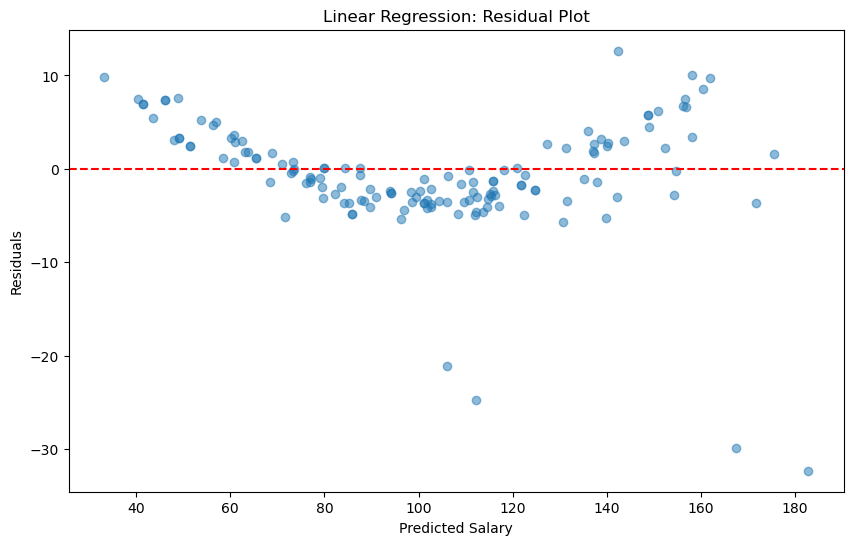

In [715]:
# Calculate residuals
residuals_linear = y_test - y_pred_linear

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals_linear, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.show()

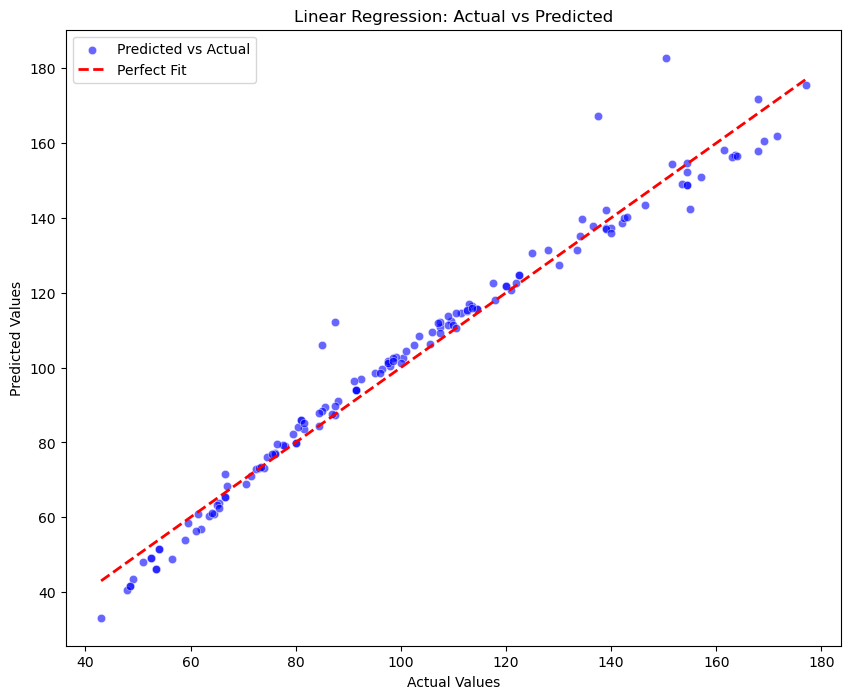

In [687]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [688]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
# Fit the Algorithm
cv_sc = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
print("Linear Regression - Cross Val r2 scores: ", cv_sc)
print("Linear Regression - Mean Cross Val r2 score: ", cv_sc.mean())
# Predict on the model

Linear Regression - Cross Val r2 scores:  [0.9762655  0.96797746 0.97724666 0.97278742 0.97399009]
Linear Regression - Mean Cross Val r2 score:  0.9736534238782744


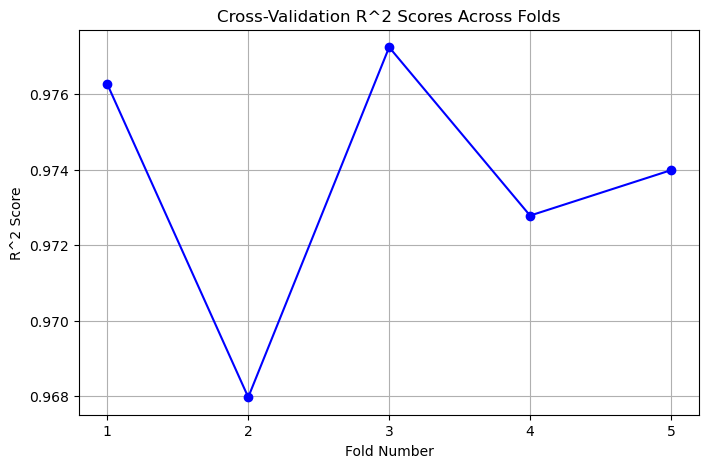

In [689]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_sc, marker='o', linestyle='-', color='blue')


plt.xlabel("Fold Number")
plt.ylabel("R^2 Score")
plt.title("Cross-Validation R^2 Scores Across Folds")
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Linear Regression has no hyperparameters to tune. But I have used cross validation score from scikit learn and applied 5 folds cross validation.

The model performs well overall, with R^2 scores around 0.968 to 0.976 (close to 1, indicating a strong fit).
There's some variation in scores across folds:
- The lowest score is around 0.968 (Fold 2).
- The highest score is about 0.976 (Fold 3).
- This means the model performs slightly worse in some splits but remains consistent overall.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The actual vs predicted graph is showing a perfect graph of linear regreesion that fits our dataset without any underfitting or overfitting!

### ML Model - 2

#### Random Forest 


In [690]:
# ML Model - 2 
from sklearn.ensemble import RandomForestRegressor
# Fit the Algorithm
randForest = RandomForestRegressor(random_state=40)
randForest.fit(X_train, y_train)
# Predict on the model
y_pred_RF = randForest.predict(X_test)
y_pred_RF

array([111.535,  56.22 ,  87.515,  92.315, 103.495,  52.53 ,  71.475,
       154.49 ,  72.545, 107.5  , 171.945,  62.035,  65.45 , 138.975,
        76.575, 133.85 , 100.62 ,  43.245, 112.49 ,  81.735, 109.48 ,
       109.035,  74.375, 154.32 ,  98.9  ,  88.09 , 181.44 , 110.05 ,
        64.16 ,  77.345,  66.93 ,  51.025,  91.87 ,  54.2  , 133.285,
        91.09 ,  72.985,  54.025,  96.54 ,  91.695, 161.79 , 114.5  ,
        87.505, 122.015,  52.53 ,  61.03 ,  80.035, 151.325,  64.88 ,
       164.355, 154.11 , 119.845, 113.505, 122.35 , 154.385,  86.97 ,
        95.   ,  66.515, 113.265,  66.515, 136.97 ,  91.695, 112.335,
       107.46 , 109.045,  77.295, 139.99 ,  79.77 ,  97.825, 139.1  ,
        76.58 ,  96.025, 114.5  , 113.55 , 122.35 ,  81.035, 137.2  ,
        59.015,  75.62 ,  80.52 ,  64.62 , 139.985, 150.23 ,  85.02 ,
       124.655, 134.34 , 107.575,  84.475,  98.02 ,  63.995, 121.005,
       102.635, 142.16 ,  61.505,  85.525, 128.155,  48.545,  47.97 ,
       146.995,  48.

#### It's an ensemble model that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

- #### It is robust to outliers and can handle non-linear relationships.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [691]:
# Visualizing evaluation Metric Score chart
mse_RF = mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)
print('Random Forest - MSE: ', mse_RF)
print("Random Forest - R2 Score: ", r2_RF)

Random Forest - MSE:  0.24135440140845046
Random Forest - R2 Score:  0.9997872409005877


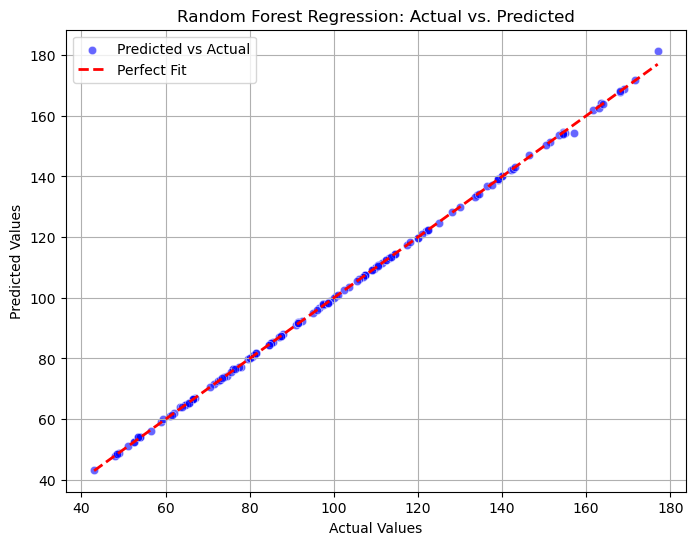

In [707]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_RF, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs. Predicted")
plt.legend()
plt.grid(True)
plt.show()


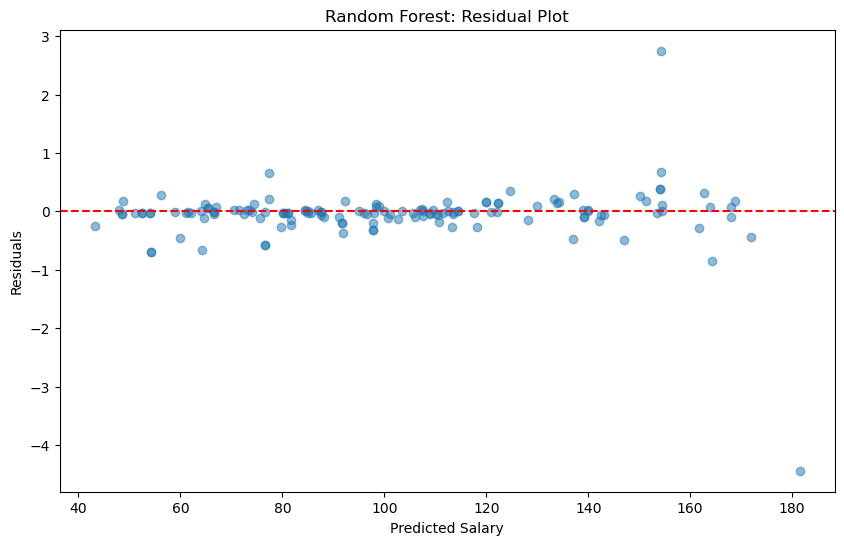

In [719]:
# Calculate residuals
residuals_rf = y_test - y_pred_RF

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_RF, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.show()

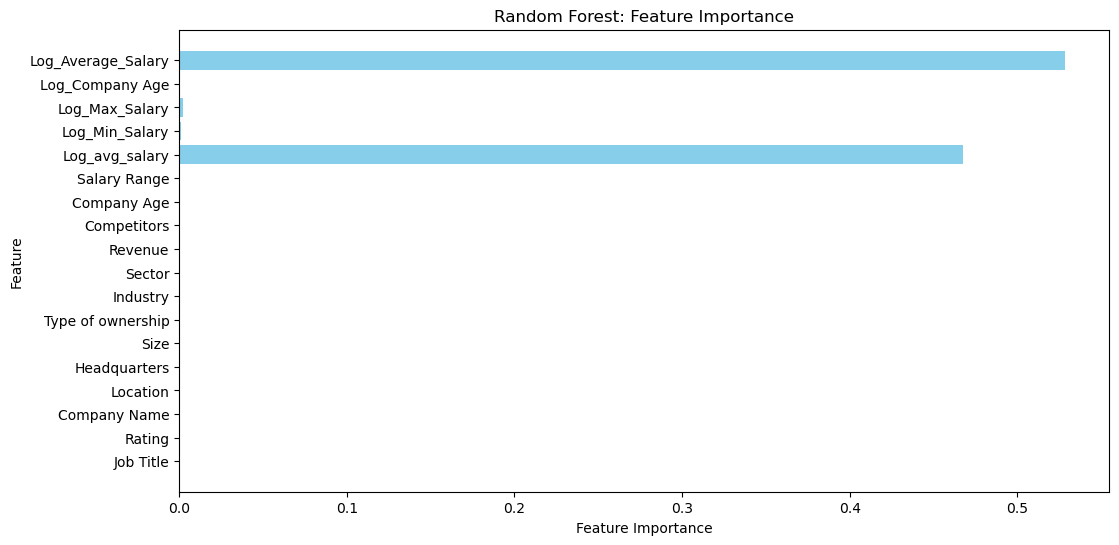

In [720]:
# Get feature importances
importances_rf = randForest.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances_rf, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest: Feature Importance')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [709]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

cv_scores_rf = cross_val_score(randForest, X_train, y_train, cv=5, scoring='r2')
print("Random Forest - Cross-Validation R2 Scores:", cv_scores_rf)
print("Random Forest - Mean Cross-Validation R2 Score:", cv_scores_rf.mean())


Random Forest - Cross-Validation R2 Scores: [0.9997042  0.99914492 0.99983288 0.99674186 0.99931794]
Random Forest - Mean Cross-Validation R2 Score: 0.9989483603775737


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(randForest, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
y_pred_rf_tuned = grid_search_rf.predict(X_test)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
print("Random Forest (Tuned) - Mean Squared Error:", mse_rf_tuned)
print("Random Forest (Tuned) - R2 Score:", r2_rf_tuned)

Random Forest - Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest (Tuned) - Mean Squared Error: 0.21355602992957656
Random Forest (Tuned) - R2 Score: 0.9998117457633391


##### Which hyperparameter optimization technique have you used and why?

For random forest I have used GridSearch Cross Validation from scikit learn

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

#### XGBoost

In [ ]:
#%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [726]:
# ML Model - 3 Implementation
from xgboost import XGBRegressor
# Fit the Algorithm
xgb_model = XGBRegressor(random_state=40)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb
# Predict on the model

array([111.50025 ,  56.57716 ,  87.55165 ,  91.89116 , 103.49884 ,
        52.499832,  71.50102 , 154.50089 ,  72.499985, 107.42928 ,
       171.50111 ,  62.004158,  65.49897 , 138.48686 ,  74.591995,
       133.2465  , 100.37864 ,  43.00095 , 112.49158 ,  81.09179 ,
       109.49807 , 109.00458 ,  74.5032  , 155.00046 ,  98.856735,
        87.62176 , 172.87933 , 109.72377 ,  63.633083,  77.124916,
        66.99521 ,  51.00035 ,  91.51753 ,  53.24029 , 132.96977 ,
        91.00917 ,  73.00091 ,  53.998924,  96.45837 ,  91.51606 ,
       161.50334 , 114.49584 ,  87.49799 , 122.01451 ,  52.499832,
        61.001682,  79.99284 , 151.49794 ,  63.660507, 161.6826  ,
       153.69539 , 120.09985 , 113.68297 , 122.50444 , 154.50014 ,
        87.01219 ,  94.99042 ,  66.28989 , 112.99842 ,  66.28989 ,
       136.50703 ,  91.51606 , 112.49344 , 107.58228 , 109.004845,
        77.31462 , 140.00037 ,  79.49679 ,  97.2851  , 139.00056 ,
        74.47216 ,  95.99733 , 114.4957  , 113.62358 , 122.504

In [727]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - Mean Squared Error: ", mse_xgb)
print("XGBoost - R2 Score: ", r2_xgb)

XGBoost - Mean Squared Error:  0.34283271536204807
XGBoost - R2 Score:  0.9996977855827618


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

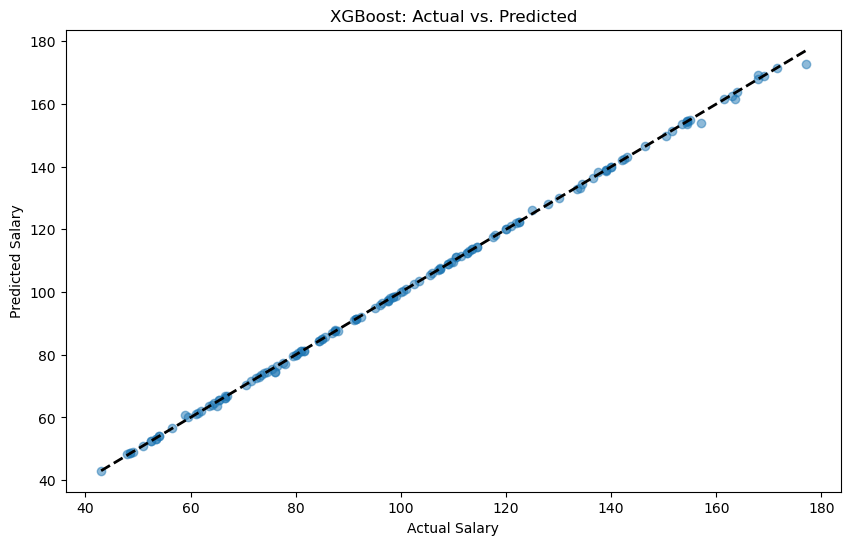

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('XGBoost: Actual vs. Predicted')
plt.show()

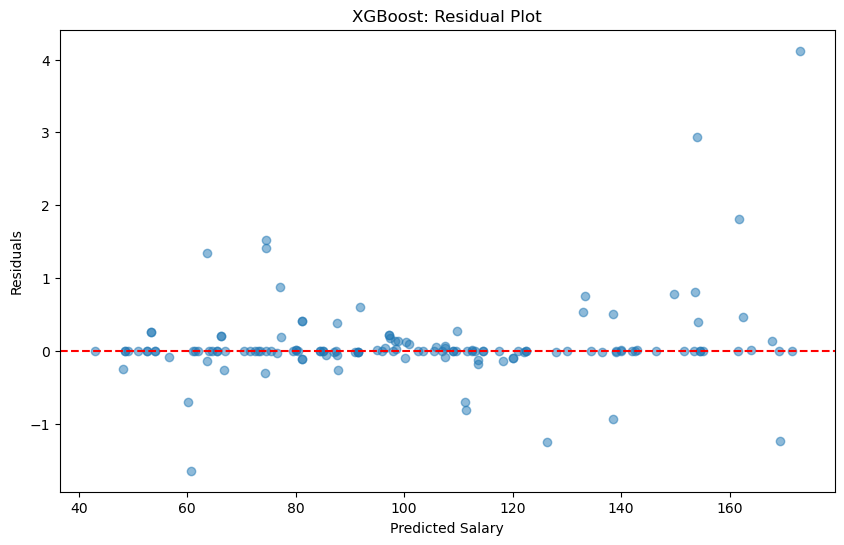

In [729]:
# Calculate residuals
residuals_xgb = y_test - y_pred_xgb

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('XGBoost: Residual Plot')
plt.show()

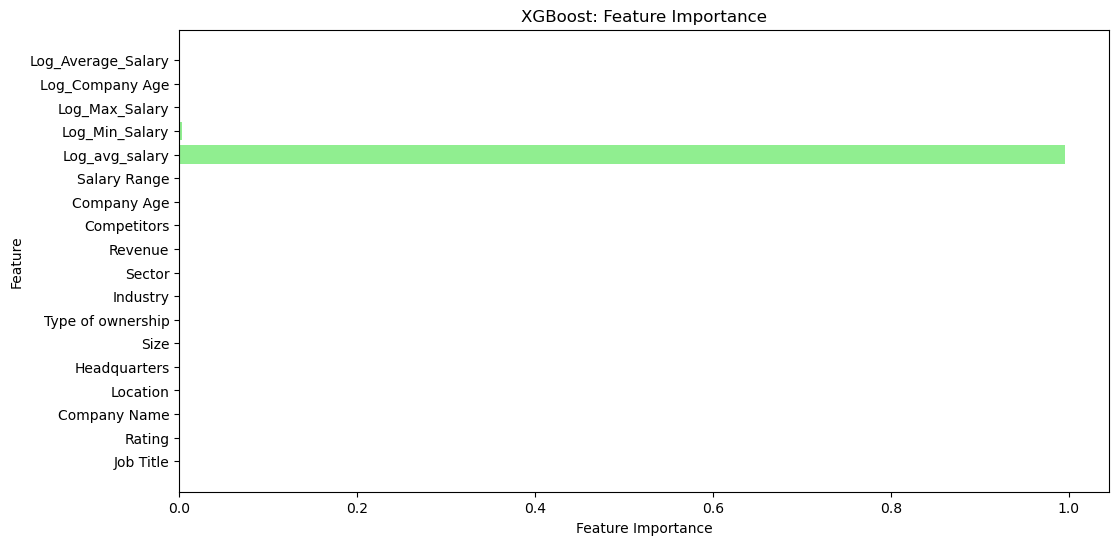

In [731]:

importances_xgb = xgb_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances_xgb, color='lightgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost: Feature Importance')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [732]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print("XGBoost - Cross-Validation R2 Scores:", cv_scores_xgb)
print("XGBoost - Mean Cross-Validation R2 Score:", cv_scores_xgb.mean())

XGBoost - Cross-Validation R2 Scores: [0.9997781  0.9975653  0.99976726 0.99792151 0.99894239]
XGBoost - Mean Cross-Validation R2 Score: 0.9987949123287748


In [733]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='r2')

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("XGBoost - Best Parameters:", grid_search_xgb.best_params_)

# Evaluate the tuned model
y_pred_xgb_tuned = grid_search_xgb.predict(X_test)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
print("XGBoost (Tuned) - Mean Squared Error:", mse_xgb_tuned)
print("XGBoost (Tuned) - R2 Score:", r2_xgb_tuned)

XGBoost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
XGBoost (Tuned) - Mean Squared Error: 0.1611464020687903
XGBoost (Tuned) - R2 Score: 0.9998579459782891


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV as hyperparameter optimization for the XGBoost model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Previously the Mean Squared Error:  0.342832715

After using GridSearchCV the MSE came down to : 0.16411464


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For all of the three models I have used Mean Squared Error and R2 Score for evaluation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [736]:
# Save the File
import joblib

best_model = grid_search_xgb.best_estimator_
joblib.dump(best_model, 'best_xgb_model.pkl')
print("Best Model saved : ")

Best Model saved : 


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [737]:
# Load the File and predict unseen data.
loadedModel = joblib.load('best_xgb_model.pkl')
print("model loaded successfully! ")

model loaded successfully! 


In [738]:
y_pred_test = loadedModel.predict(X_test)
X_test['Predicted Salary'] = y_pred_test
print(X_test[['Predicted Salary']].head())

     Predicted Salary
642        111.461929
89          56.826794
85          87.456604
264         92.365883
417        103.435783


In [739]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('MSE on test data: ', mse_test)
print('R2 score on test data', r2_test)

MSE on test data:  0.1611464020687903
R2 score on test data 0.9998579459782891


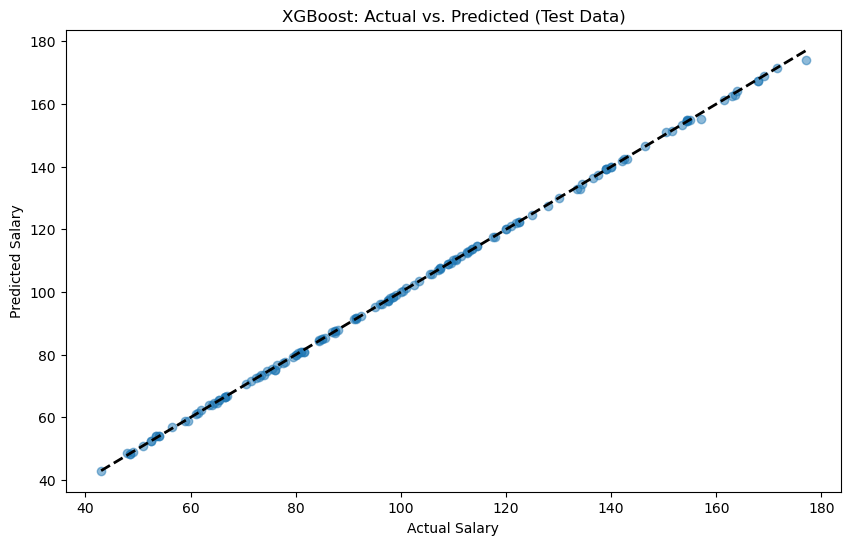

In [740]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('XGBoost: Actual vs. Predicted (Test Data)')
plt.show()

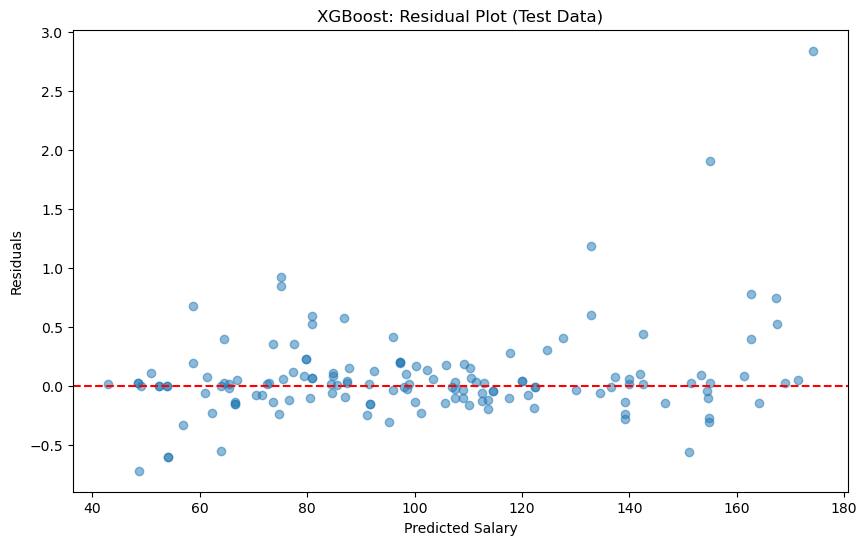

In [741]:
# Calculate residuals
residuals_test = y_test - y_pred_test

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('XGBoost: Residual Plot (Test Data)')
plt.show()

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***